In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
df = pd.read_csv('Superstore.csv')
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
#Let's take a look at our data for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

## GETTING TO KNOW OUR DATA____________________________________________________________________________________________

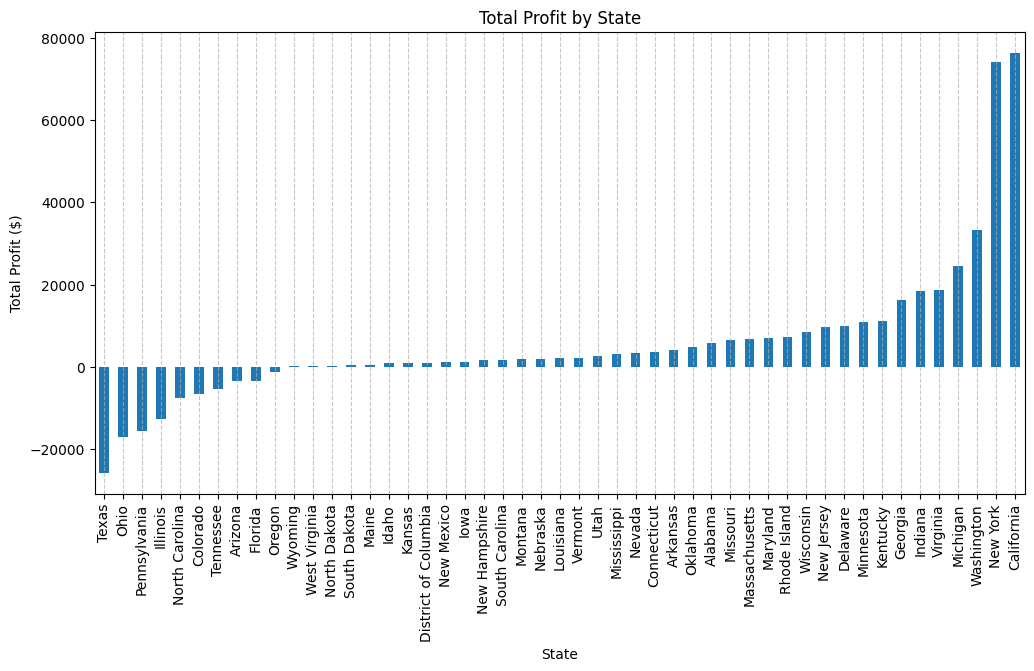

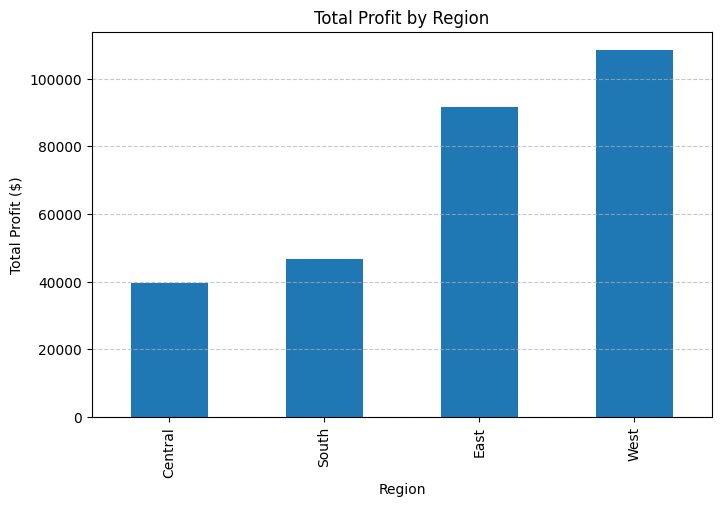

In [6]:
# Let's take a look at profits by state and region.

# profit by state
state_profit = df.groupby("State")["Profit"].sum().sort_values()

# Plot total profit by state
plt.figure(figsize=(12, 6))
state_profit.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Total Profit ($)")
plt.title("Total Profit by State")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Aggregate profit by region
region_profit = df.groupby("Region")["Profit"].sum().sort_values()

# Plot total profit by region
plt.figure(figsize=(8, 5))
region_profit.plot(kind='bar')
plt.ylabel("Total Profit ($)")
plt.xlabel("Region")
plt.title("Total Profit by Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [7]:
# Let's get a print out of which states are making losses and which regions they are in.
# Filter only states with negative profit
losses = df[df['Profit'] < 0]

# Group by Region and State, then sum the profits
losses = losses.groupby(['Region', 'State'])['Profit'].sum().reset_index()

# Sort by Profit (ascending)
losses = losses.sort_values(by='Profit')

# Display the full table
losses




Region           State      Profit
1   Central           Texas -36813.1875
9      East            Ohio -21750.0002
10     East    Pennsylvania -21602.8515
0   Central        Illinois -19501.6975
14    South  North Carolina -11557.9854
18     West        Colorado  -8900.9048
13    South         Florida  -8689.8295
15    South       Tennessee  -7257.0174
16     West         Arizona  -6656.7675
8      East        New York  -5031.1378
17     West      California  -3769.6651
21     West          Oregon  -2890.4764
5      East   Massachusetts   -566.2617
22     West      Washington   -387.8706
11     East    Rhode Island   -230.1678
19     West          Nevada   -109.5822
6      East   New Hampshire   -105.3164
3      East        Delaware    -85.8963
12     East   West Virginia    -76.9536
4      East        Maryland    -71.1170
7      East      New Jersey    -51.2906
2      East     Connecticut    -19.6146
20     West      New Mexico     -5.6943

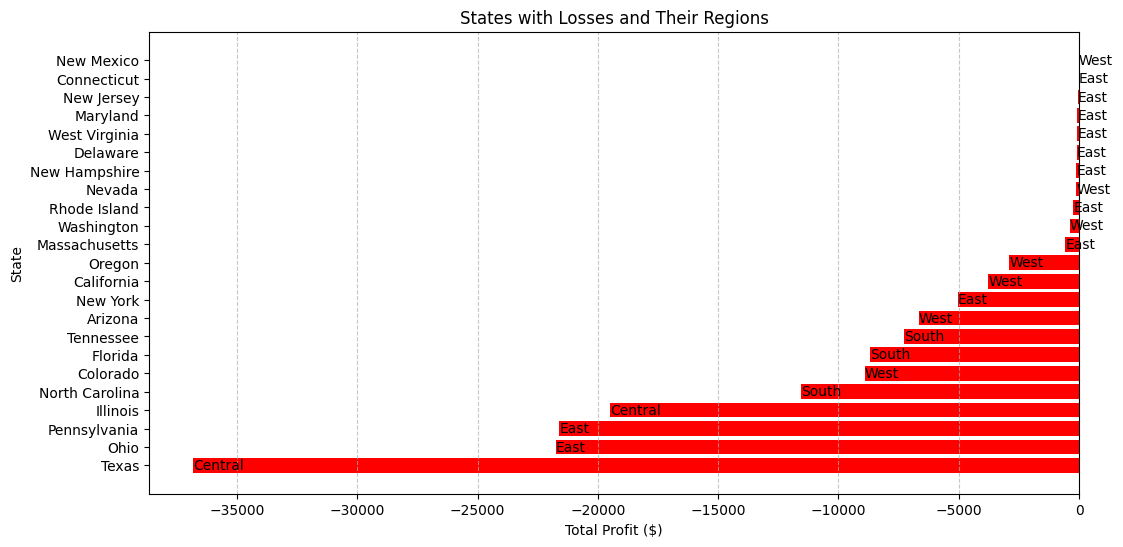

In [8]:
# Let's visualize that.
# Filter only states with negative profit
losses = df[df['Profit'] < 0]

# Group by Region and State, then sum the profits
losses = losses.groupby(['Region', 'State'])['Profit'].sum().reset_index()

# Sort by Profit (ascending)
losses = losses.sort_values(by='Profit')

# Plot total losses by state with region labels
plt.figure(figsize=(12, 6))
bars = plt.barh(losses["State"], losses["Profit"], color='red')

# Add region labels next to bars
for bar, region in zip(bars, losses["Region"]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{region}", 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel("Total Profit ($)")
plt.ylabel("State")
plt.title("States with Losses and Their Regions")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [9]:
# Interesting, East and West regions brig in the most profits, but also have the most states with losses.

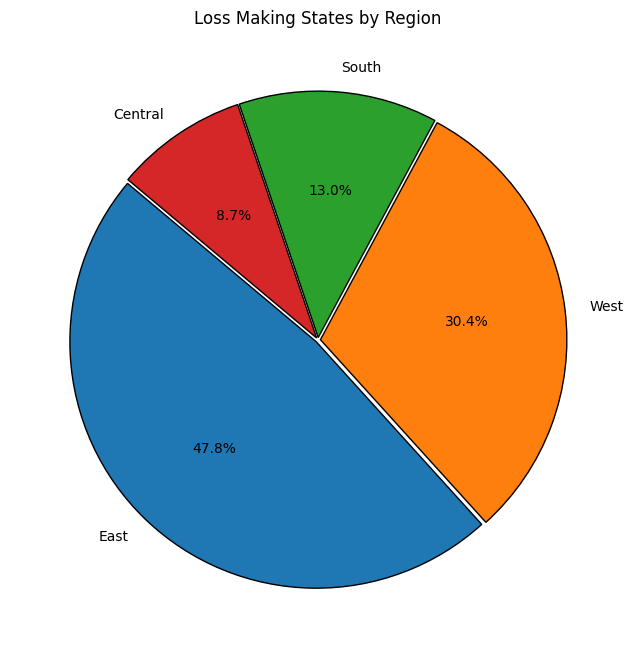

In [10]:
#Let's take a look at regions with stores making losses.
losses_by_region = losses["Region"].value_counts()

plt.figure(figsize=(8, 8))
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(losses_by_region, explode=explode, labels=losses_by_region.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Loss Making States by Region")

# Show the plot
plt.show()


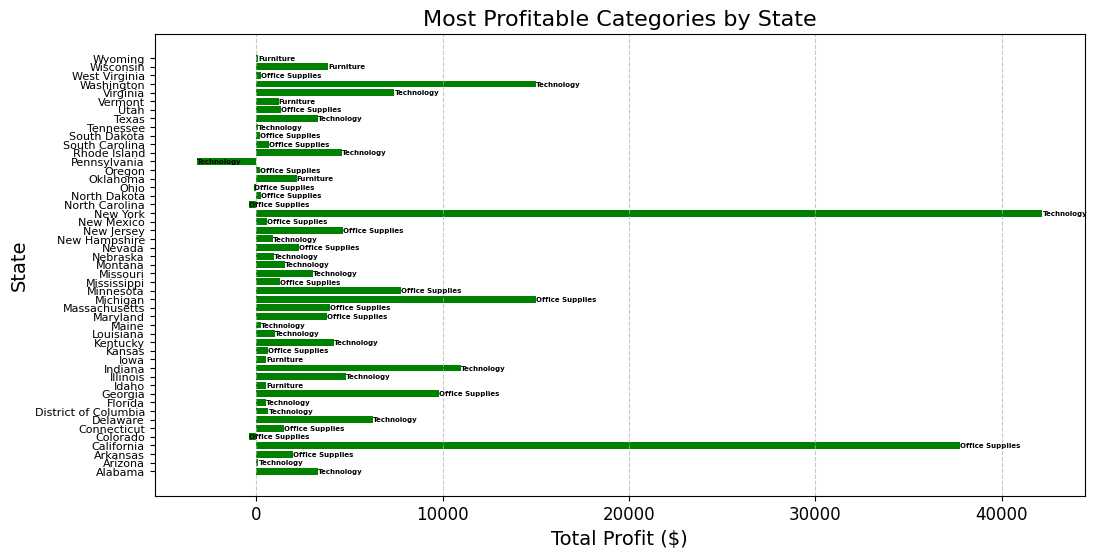

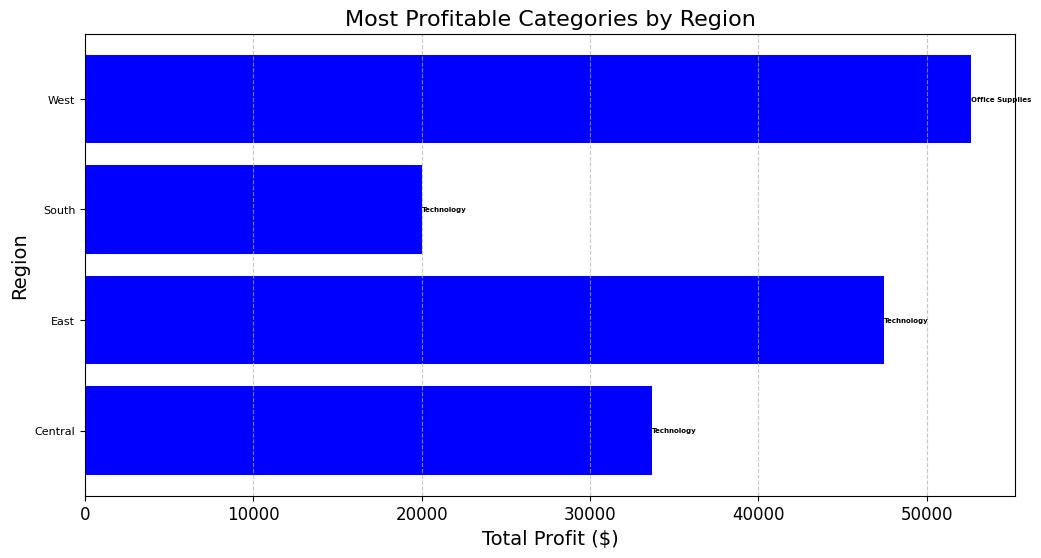

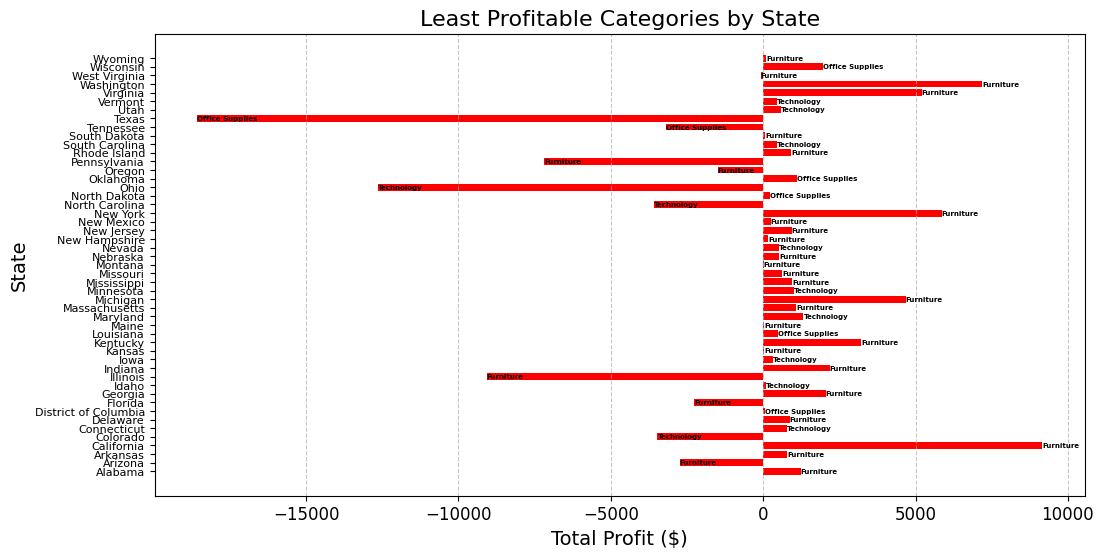

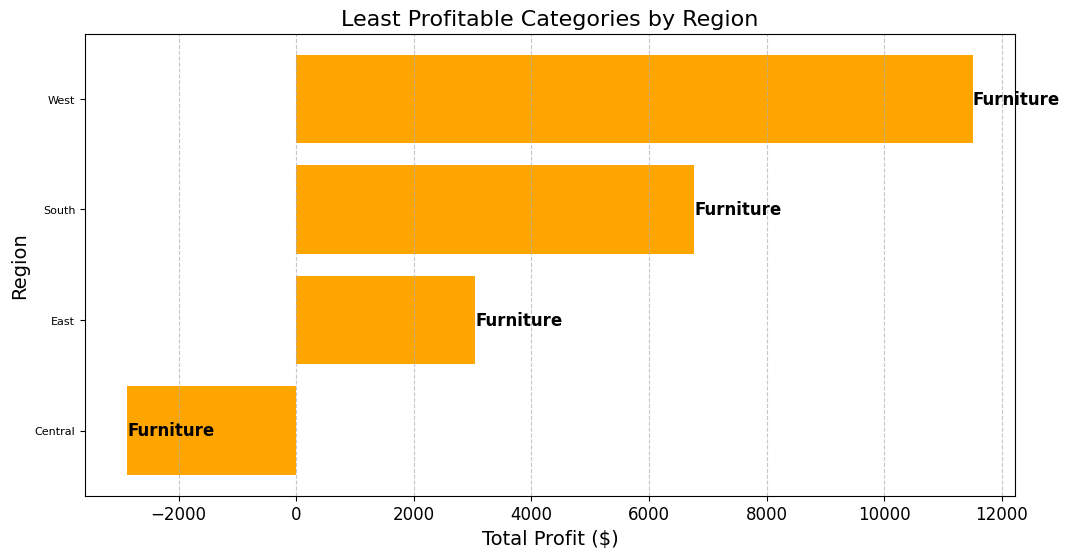

In [11]:
# Let's take a look at the most and least profitable categories by state and region.

# Group by State and Category to find the most and least profitable categories
state_category_profit = df.groupby(["State", "Category"])["Profit"].sum().reset_index()
most_profitable_category_by_state = state_category_profit.loc[state_category_profit.groupby("State")["Profit"].idxmax()]
least_profitable_category_by_state = state_category_profit.loc[state_category_profit.groupby("State")["Profit"].idxmin()]

# Group by Region and Category to find the most and least profitable categories
region_category_profit = df.groupby(["Region", "Category"])["Profit"].sum().reset_index()
most_profitable_category_by_region = region_category_profit.loc[region_category_profit.groupby("Region")["Profit"].idxmax()]
least_profitable_category_by_region = region_category_profit.loc[region_category_profit.groupby("Region")["Profit"].idxmin()]

# Function to plot bar charts with larger text annotations
def plot_bar_chart(data, x_col, y_col, title, color, font_size=12):
    plt.figure(figsize=(12, 6))
    plt.barh(data[x_col], data[y_col], color=color)
    plt.xlabel("Total Profit ($)", fontsize=14)
    plt.ylabel(x_col, fontsize=14)
    plt.title(title, fontsize=16)

    # Annotate bars with categories (adjust fontsize for better readability)
    for index, value in enumerate(data[y_col]):
        plt.text(value, index, data["Category"].iloc[index], 
                 va='center', ha='left', fontsize=font_size, fontweight='bold')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)  # Increase font size of x-axis labels
    plt.yticks(fontsize=8)  # Increase font size of y-axis labels
    plt.show()

# Adjust `font_size` to a larger number if you still find the text too small
plot_bar_chart(most_profitable_category_by_state, "State", "Profit", "Most Profitable Categories by State", "green", font_size=5)
plot_bar_chart(most_profitable_category_by_region, "Region", "Profit", "Most Profitable Categories by Region", "blue", font_size=5)
plot_bar_chart(least_profitable_category_by_state, "State", "Profit", "Least Profitable Categories by State", "red", font_size=5)
plot_bar_chart(least_profitable_category_by_region, "Region", "Profit", "Least Profitable Categories by Region", "orange", font_size=12)


In [12]:
# Looking through our data. We can see that the most profitable categories are Technology and Office Supplies, while Furniture is the least profitable category.
# Furniture is generating losses in 50% of the states that see a loss and is the only category that generates a loss in 1 of the 4 regions.
# For this exercise, we will be focusign on the Furniture category and trying to find a strategy to improve profits in this category.

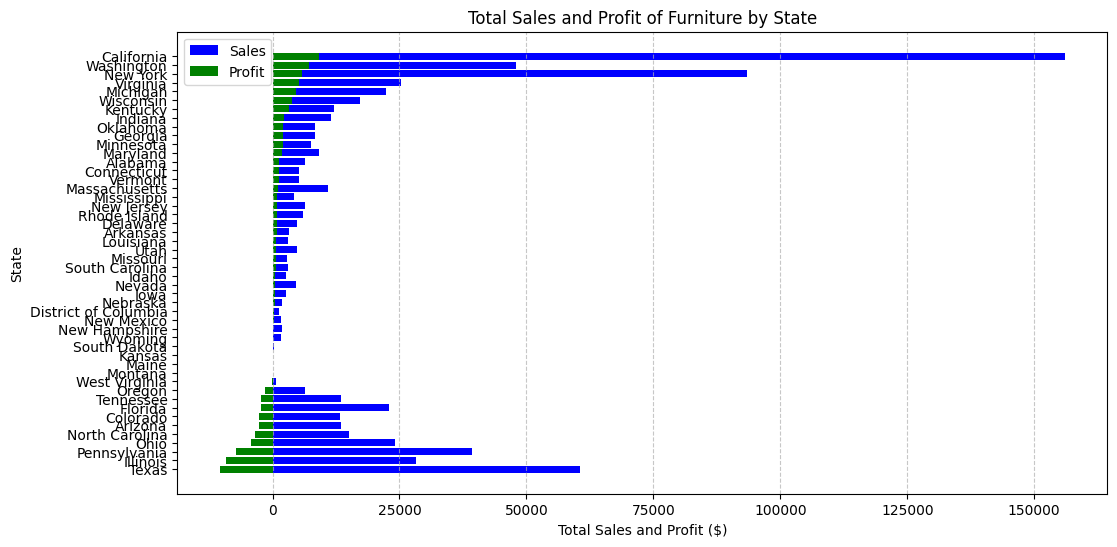

In [13]:
# Let's take a look at the sales and profits of the Furniture category by state.

# Filter only the Furniture category
furniture = df[df["Category"] == "Furniture"]

# Group by State and Region, then sum the Sales and Profit
furniture_sales_profit = furniture.groupby(["State"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
furniture_sales_profit = furniture_sales_profit.sort_values(by='Profit')

# Display the full table
furniture_sales_profit

# Plot total sales and profit by state
plt.figure(figsize=(12, 6))
plt.barh(furniture_sales_profit["State"], furniture_sales_profit["Sales"], color='blue', label='Sales')
plt.barh(furniture_sales_profit["State"], furniture_sales_profit["Profit"], color='green', label='Profit')

plt.xlabel("Total Sales and Profit ($)")
plt.ylabel("State")
plt.title("Total Sales and Profit of Furniture by State")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


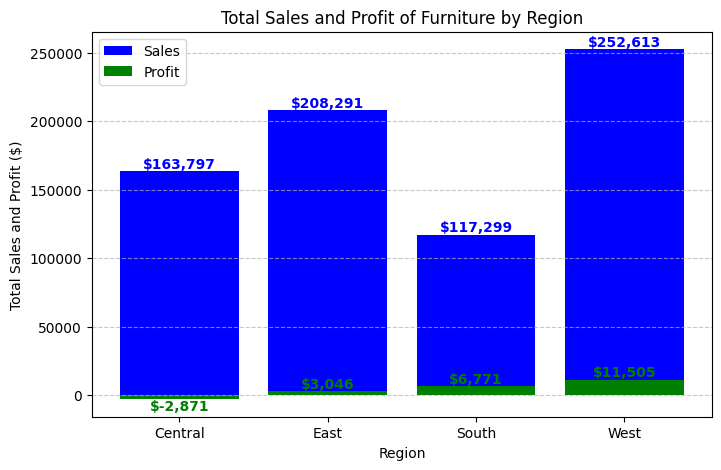

In [14]:
# Let's take a look at the sales and profits of the Furniture category by region.

# Group by Region, then sum the Sales and Profit
furniture_sales_profit_by_region = furniture.groupby("Region")[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
furniture_sales_profit_by_region = furniture_sales_profit_by_region.sort_values(by='Profit')



# Plot total sales and profit by region
plt.figure(figsize=(8, 5))
bars1 = plt.bar(furniture_sales_profit_by_region["Region"], furniture_sales_profit_by_region["Sales"], 
                color='blue', label='Sales')
bars2 = plt.bar(furniture_sales_profit_by_region["Region"], furniture_sales_profit_by_region["Profit"],
                color='green', label='Profit')

# Add labels on Sales bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=10, color="blue", fontweight="bold")

# Add labels on Profit bars
for bar in bars2:
    height = bar.get_height()
    if height >= 0:
        va_position = 'bottom'  # Position above the bar for positive values
        offset = 5  # Offset upwards
    else:
        va_position = 'top'  # Position inside the bar for negative values
        offset = -5  # Offset downwards

    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
             ha='center', va=va_position, fontsize=10, color="green", fontweight="bold")

plt.ylabel("Total Sales and Profit ($)")
plt.xlabel("Region")
plt.title("Total Sales and Profit of Furniture by Region")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

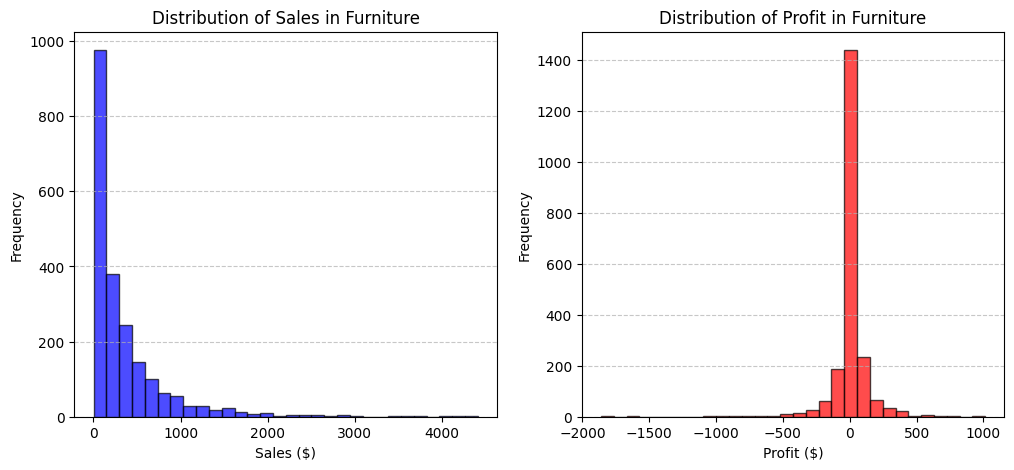

In [15]:
# First up, let's take a look at the distribution of sales and profit in the Furniture category
furniture_distribution = df[df["Category"] == "Furniture"][["Sales", "Profit"]]

# Plot histograms for Sales and Profit distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sales Distribution
axes[0].hist(furniture_distribution["Sales"], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title("Distribution of Sales in Furniture")
axes[0].set_xlabel("Sales ($)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Profit Distribution
axes[1].hist(furniture_distribution["Profit"], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title("Distribution of Profit in Furniture")
axes[1].set_xlabel("Profit ($)")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.show()

#

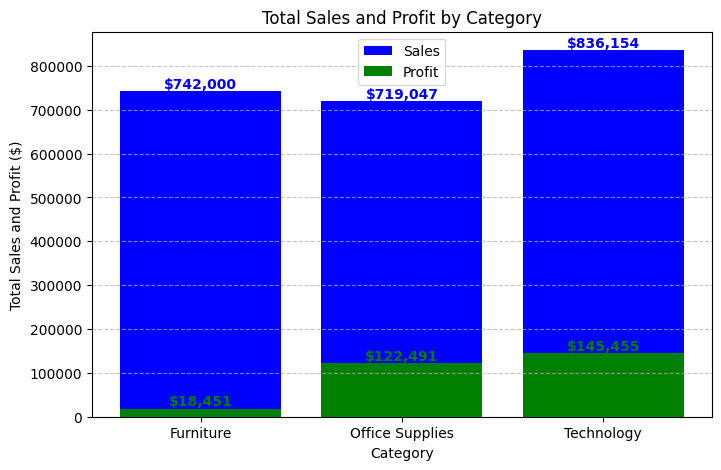

In [16]:
# Let's take a look at the sales and profits generated by each category.

# Group sales and profit by category
categories_sales_profits = df.groupby(["Category"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
categories_sales_profits = categories_sales_profits.sort_values(by='Profit')

# Plot total sales and profit by category
plt.figure(figsize=(8, 5))

# Bar chart for Sales
bars1 = plt.bar(categories_sales_profits["Category"], categories_sales_profits["Sales"], 
                color='blue', label='Sales')

# Bar chart for Profit
bars2 = plt.bar(categories_sales_profits["Category"], categories_sales_profits["Profit"], 
                color='green', label='Profit')

# Add labels on Sales bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=10, color="blue", fontweight="bold")

# Add labels on Profit bars
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=10, color="green", fontweight="bold")

# Formatting
plt.ylabel("Total Sales and Profit ($)")
plt.xlabel("Category")
plt.title("Total Sales and Profit by Category")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [17]:
# We can see a left skew in the distribution of sales and profit in the Furniture category. This means that most of the sales and profit are in the lower range.
# Furniture generates the least profit compared to the other two categories, but it generates the most sales. This could be due to the high volume of low-profit sales.
# Let's move on and take a closer look at the sub categories in the Furniture category.

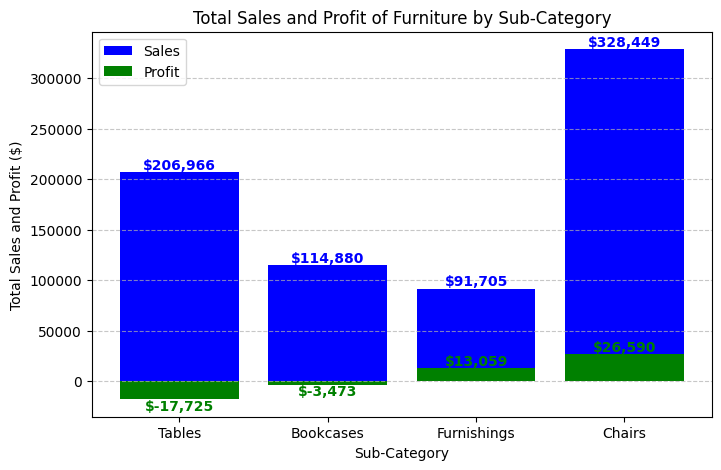

In [18]:
# Let's take a look at the sales and profits generated by each sub-categories in Furniture.
# Group sales and profit by sub-category for Furniture
furniture_subcategory_sales_profits = furniture.groupby(["Sub-Category"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
furniture_subcategory_sales_profits = furniture_subcategory_sales_profits.sort_values(by='Profit')

# Plot total sales and profit by sub-category
plt.figure(figsize=(8, 5))

# Bar chart for Sales
bars1 = plt.bar(furniture_subcategory_sales_profits["Sub-Category"], 
                furniture_subcategory_sales_profits["Sales"], 
                color='blue', label='Sales')

# Bar chart for Profit
bars2 = plt.bar(furniture_subcategory_sales_profits["Sub-Category"], 
                furniture_subcategory_sales_profits["Profit"], 
                color='green', label='Profit')

# Add labels on Sales bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=10, color="blue", fontweight="bold")

# Add labels on Profit bars with adjustments for negative values
for bar in bars2:
    height = bar.get_height()
    if height >= 0:
        va_position = 'bottom'  # Position above the bar for positive values
        offset = 5  # Offset upwards
    else:
        va_position = 'top'  # Position inside the bar for negative values
        offset = -5  # Offset downwards

    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
             ha='center', va=va_position, fontsize=10, color="green", fontweight="bold")

# Formatting
plt.ylabel("Total Sales and Profit ($)")
plt.xlabel("Sub-Category")
plt.title("Total Sales and Profit of Furniture by Sub-Category")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


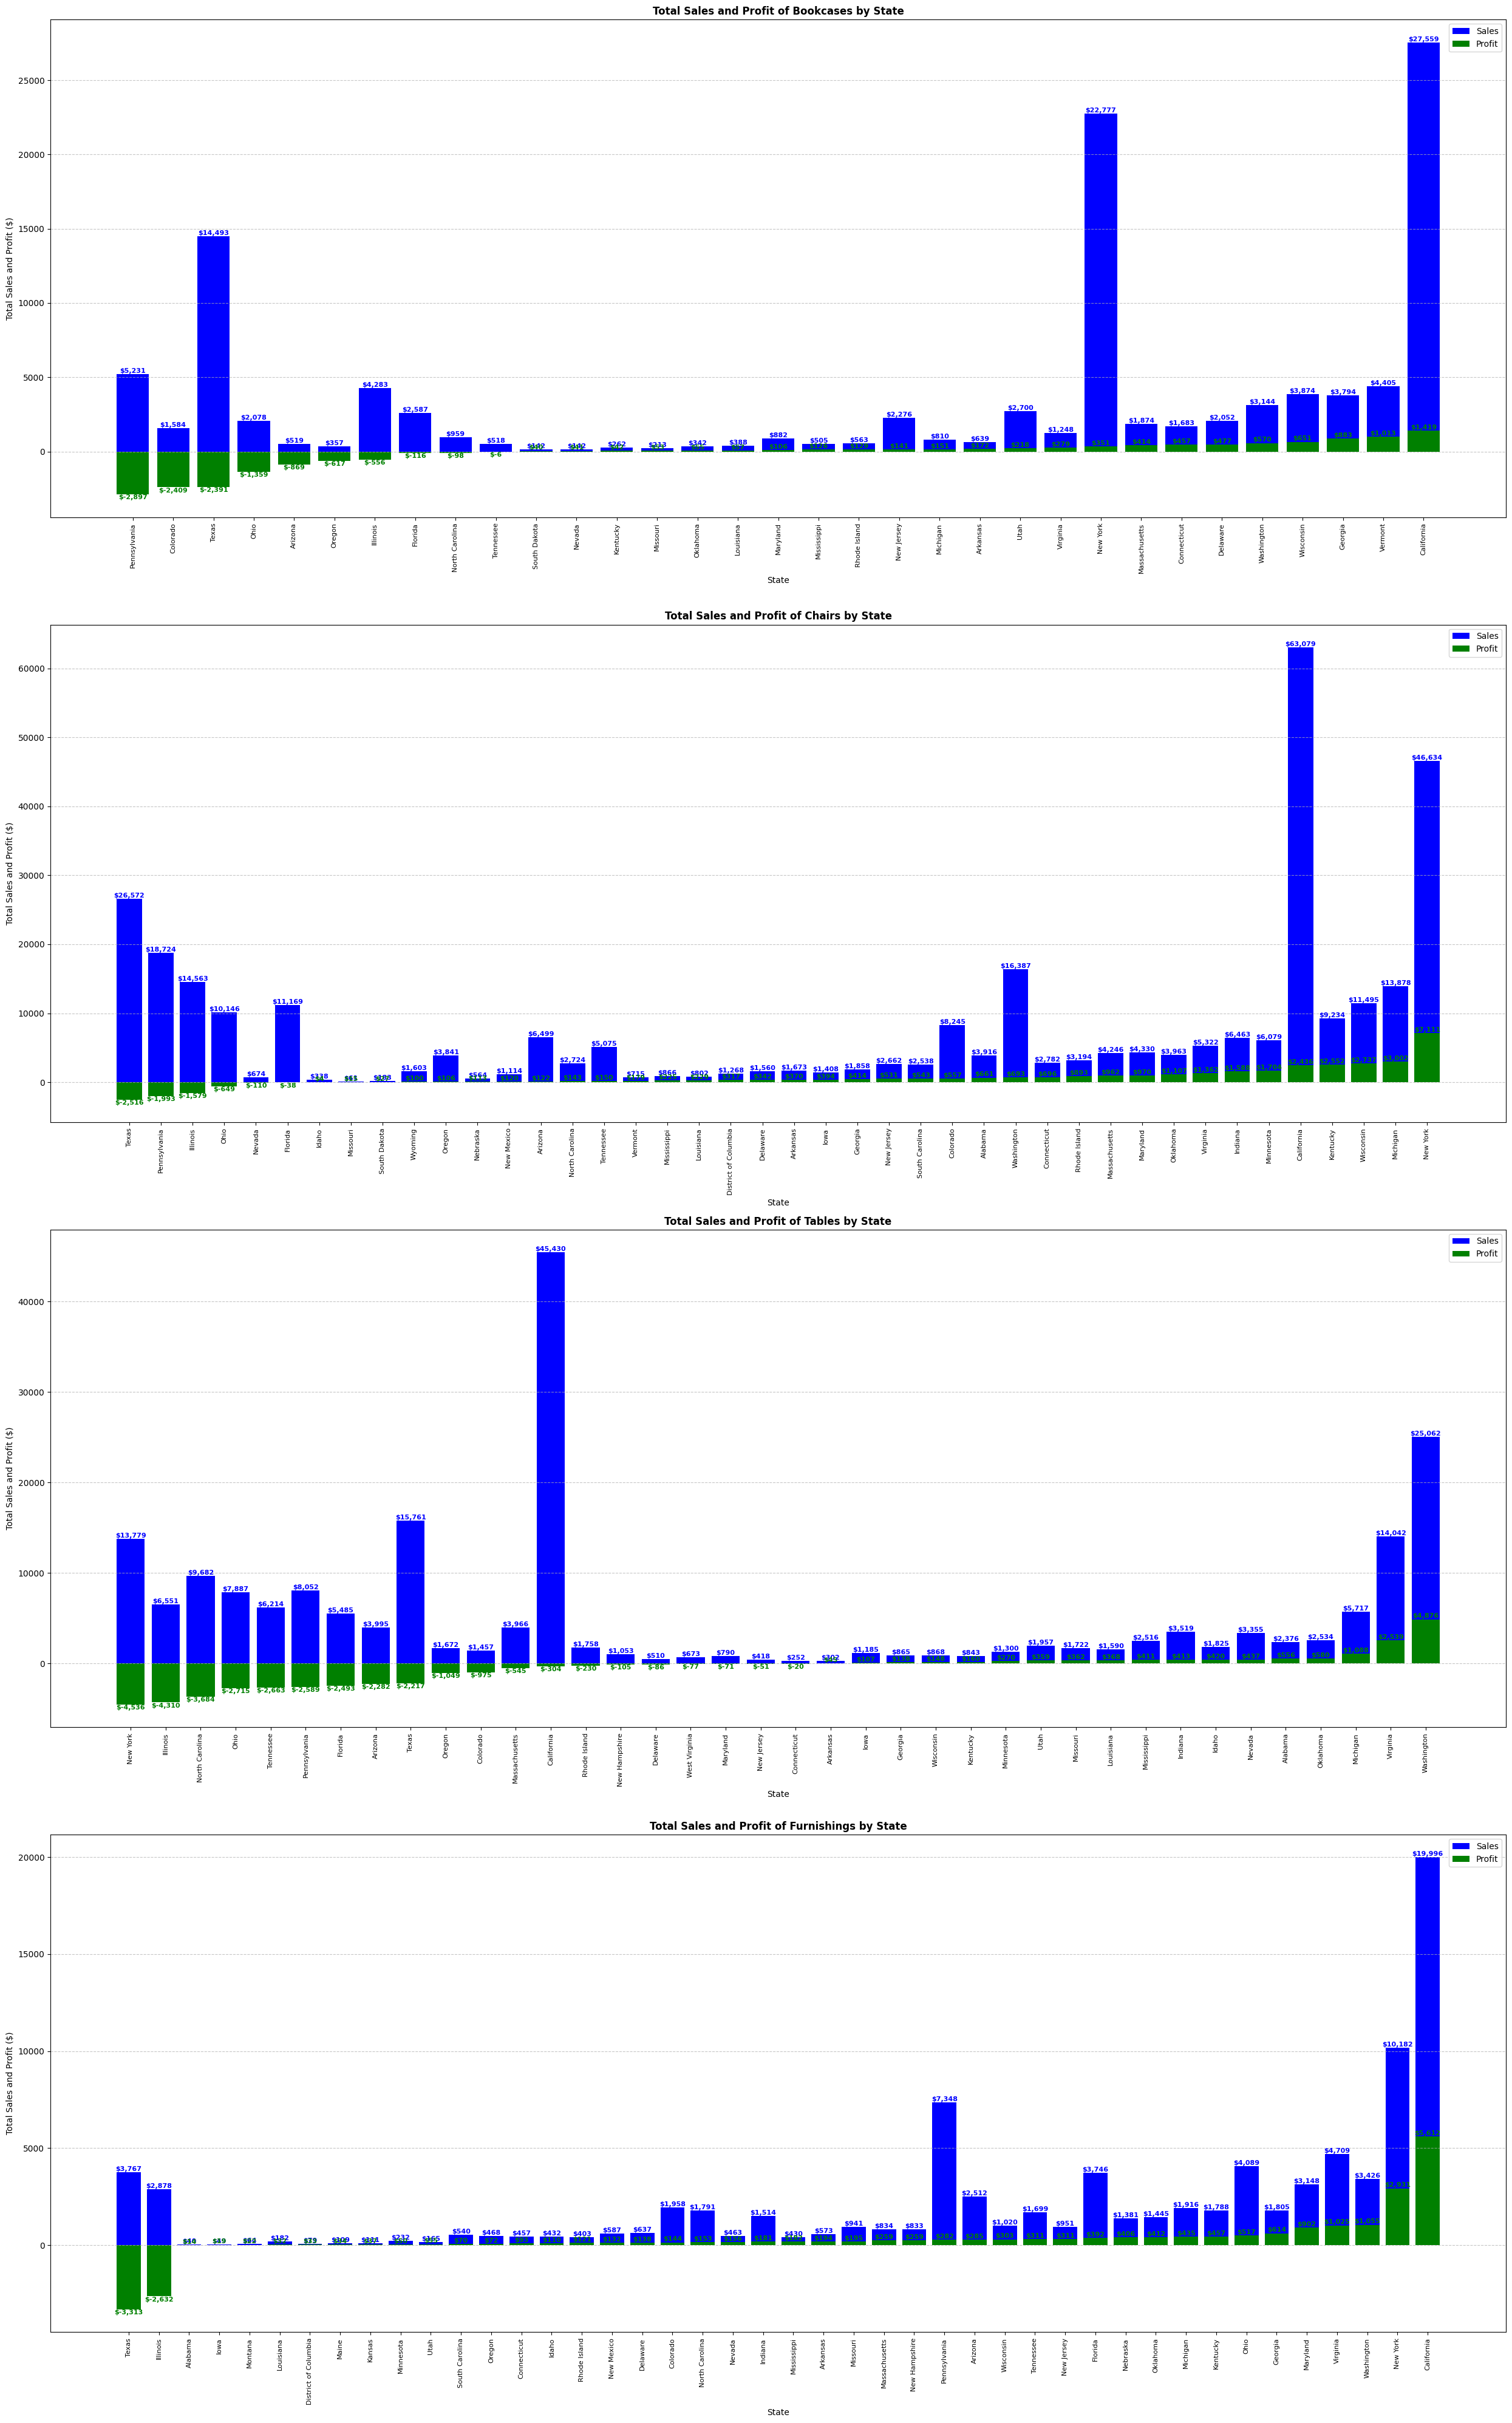

In [19]:
# Let's take a look at the sales and profits generated by each sub-categories in Furniture by state.

furniture_subcategories = df[df["Category"] == "Furniture"]["Sub-Category"].unique()

# Create subplots for each sub-category
fig, axes = plt.subplots(nrows=len(furniture_subcategories), figsize=(25, len(furniture_subcategories) * 10))

# Ensure axes is iterable even if there's only one subplot
if len(furniture_subcategories) == 1:
    axes = [axes]

# Loop through each sub-category and plot a histogram-style bar chart for states
for i, sub_category in enumerate(furniture_subcategories):
    # Filter data for the current sub-category
    subcategory_state_data = df[(df["Category"] == "Furniture") & (df["Sub-Category"] == sub_category)]

    # Group by state and sum sales and profit
    state_sales_profits = subcategory_state_data.groupby("State")[["Sales", "Profit"]].sum().reset_index()

    # Sort states by profit (ascending)
    state_sales_profits = state_sales_profits.sort_values(by='Profit')

    # Create subplot for this sub-category
    ax = axes[i]

    # Bar chart for Sales
    bars1 = ax.bar(state_sales_profits["State"], state_sales_profits["Sales"], color='blue', label='Sales')

    # Bar chart for Profit
    bars2 = ax.bar(state_sales_profits["State"], state_sales_profits["Profit"], color='green', label='Profit')

    # Add labels on Sales bars
    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
                ha='center', va='bottom', fontsize=8, color="blue", fontweight="bold")

    # Add labels on Profit bars with adjustments for negative values
    for bar in bars2:
        height = bar.get_height()
        if height >= 0:
            va_position = 'bottom'  # Position above the bar for positive values
            offset = 5  # Offset upwards
        else:
            va_position = 'top'  # Position inside the bar for negative values
            offset = -5  # Offset downwards

        ax.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
                ha='center', va=va_position, fontsize=8, color="green", fontweight="bold")

    # Formatting
    ax.set_ylabel("Total Sales and Profit ($)", fontsize=10)
    ax.set_xlabel("State", fontsize=10)
    ax.set_title(f"Total Sales and Profit of {sub_category} by State", fontsize=12, fontweight="bold")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # **Fix x-axis labels warning**
    ax.set_xticks(range(len(state_sales_profits["State"])))  # Set fixed ticks
    ax.set_xticklabels(state_sales_profits["State"], rotation=90, fontsize=8)  # Assign labels

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [20]:
# We can see that book cases usually don't make a high profit with some areas with heavy losses.
# Tables make a loss in over half of the states.
# Next up we're going to look for some correlations in the data.

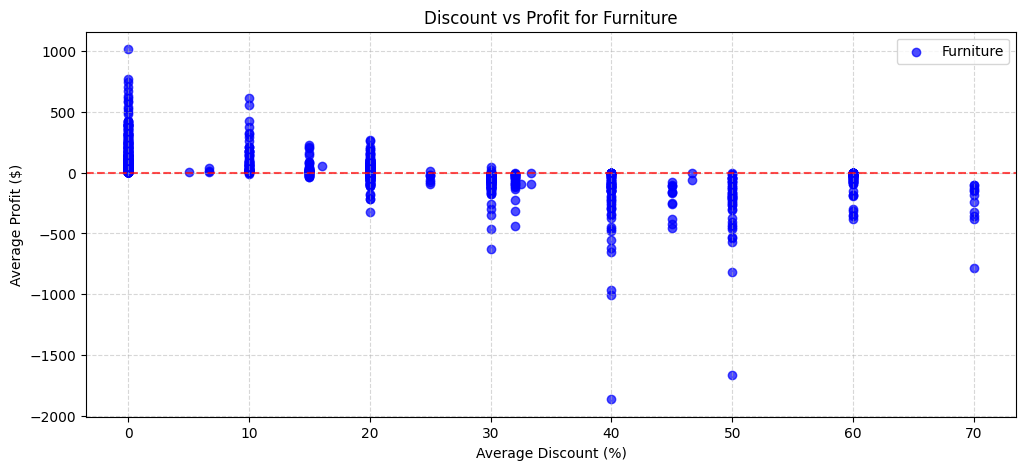

In [21]:
# Let's take a look at the correlation between sales, profit, and discount in the Furniture category with a scatter plot.

# Filter only the Furniture category and group by State
furniture_discount = df[df["Category"] == "Furniture"].groupby("Sales")[["Discount", "Profit"]].mean().reset_index()

# Plot discounting patterns for Furniture
plt.figure(figsize=(12, 5))
plt.scatter(furniture_discount["Discount"] * 100, furniture_discount["Profit"], color='blue', label="Furniture", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Furniture")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

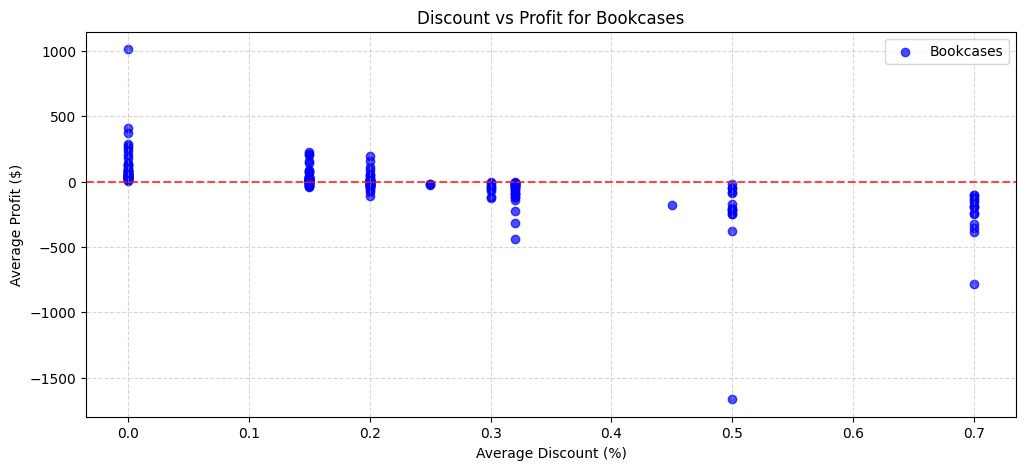

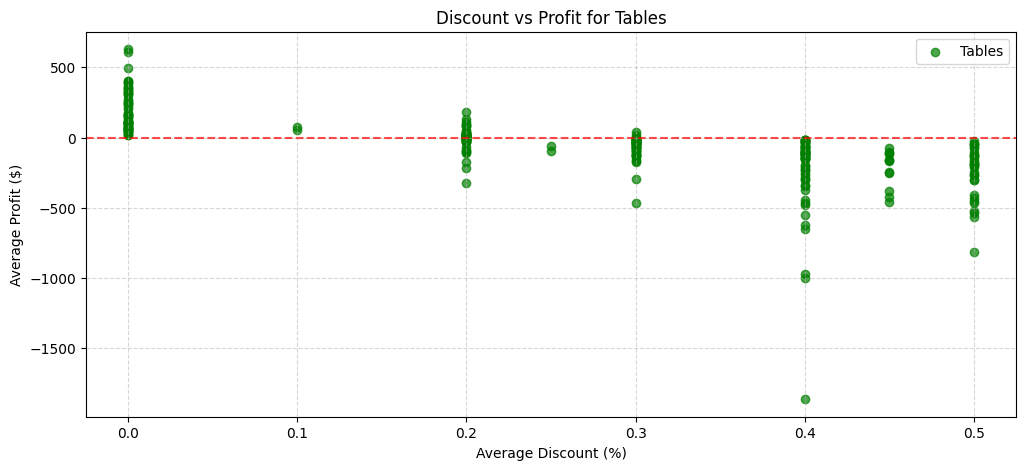

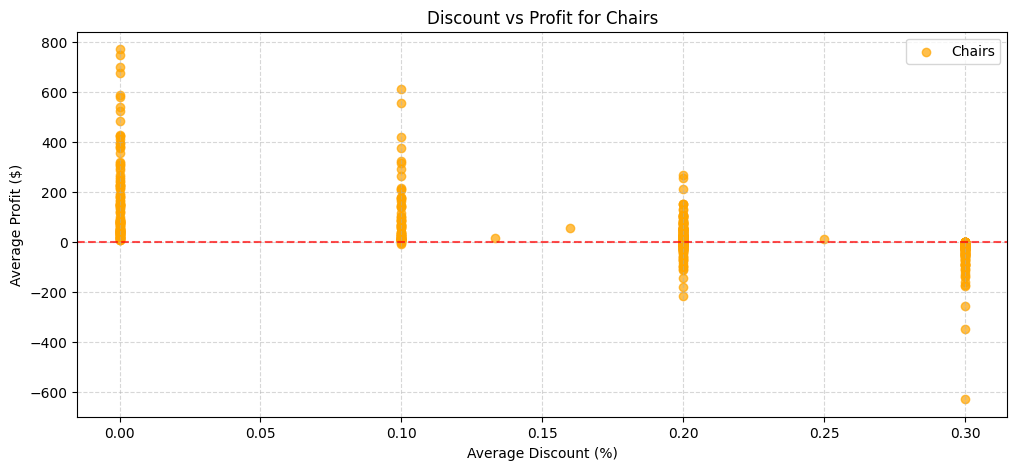

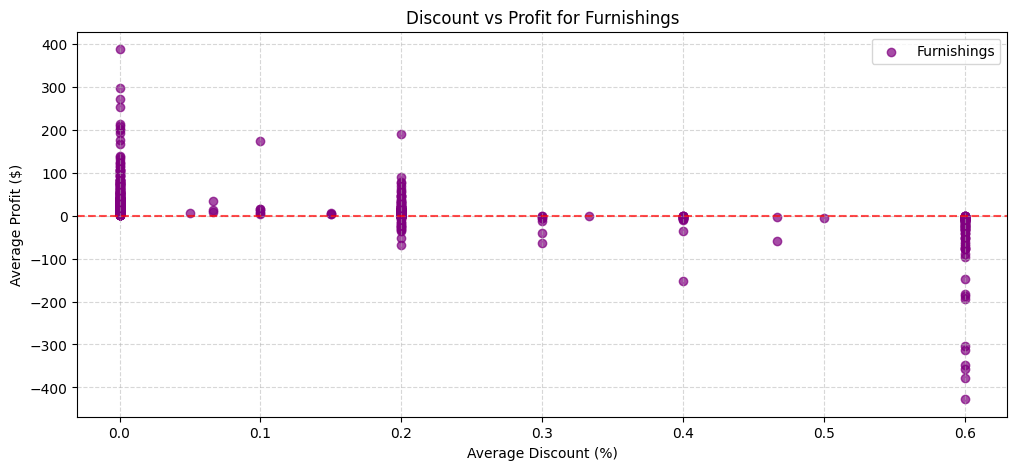

In [22]:
# First up, a scatter plot of discounts vs profits in the Bookcase and Table sub-category.
# Group by State and Sub-Category to analyze average discount for Furniture
furniture_discount_analysis = df[df["Category"] == "Furniture"].groupby(["Sales", "Sub-Category"])[["Discount", "Profit"]].mean().reset_index()

# Filter for Bookcases and Tables since they are major loss-making sub-categories
bookcases_discount = furniture_discount_analysis[furniture_discount_analysis["Sub-Category"] == "Bookcases"]
tables_discount = furniture_discount_analysis[furniture_discount_analysis["Sub-Category"] == "Tables"]
chairs_discount = furniture_discount_analysis[furniture_discount_analysis["Sub-Category"] == "Chairs"]
furnishing_discount = furniture_discount_analysis[furniture_discount_analysis["Sub-Category"] == "Furnishings"]

# Plot discounting patterns for Bookcases
plt.figure(figsize=(12, 5))
plt.scatter(bookcases_discount["Discount"], bookcases_discount["Profit"], color='blue', label="Bookcases", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Bookcases")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot discounting patterns for Tables
plt.figure(figsize=(12, 5))
plt.scatter(tables_discount["Discount"], tables_discount["Profit"], color='green', label="Tables", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Tables")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot discounting patterns for Chairs
plt.figure(figsize=(12, 5))
plt.scatter(chairs_discount["Discount"], chairs_discount["Profit"], color='orange', label="Chairs", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Chairs")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot discounting patterns for Furnishings
plt.figure(figsize=(12, 5))
plt.scatter(furnishing_discount["Discount"], furnishing_discount["Profit"], color='purple', label="Furnishings", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Furnishings")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


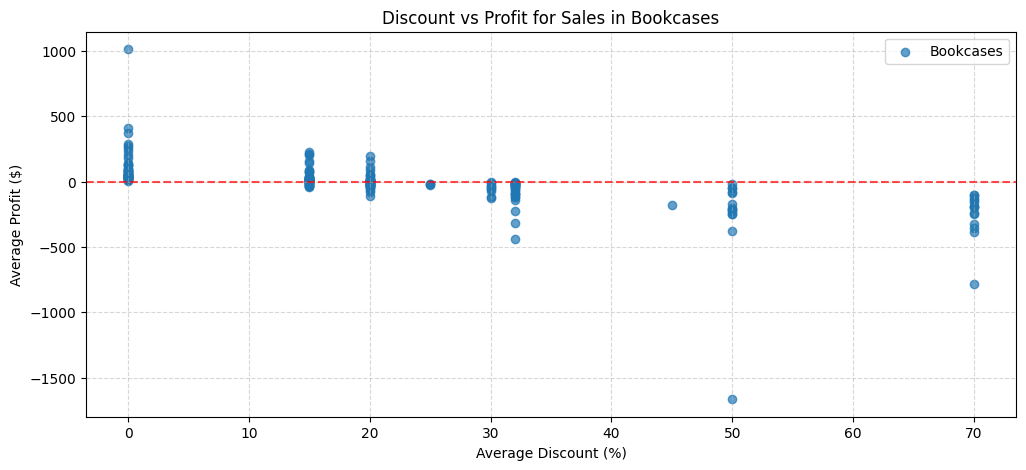

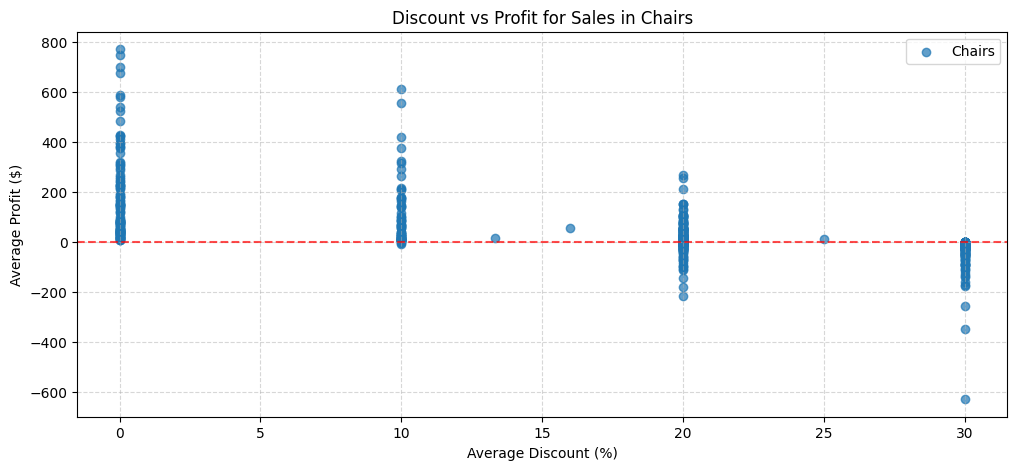

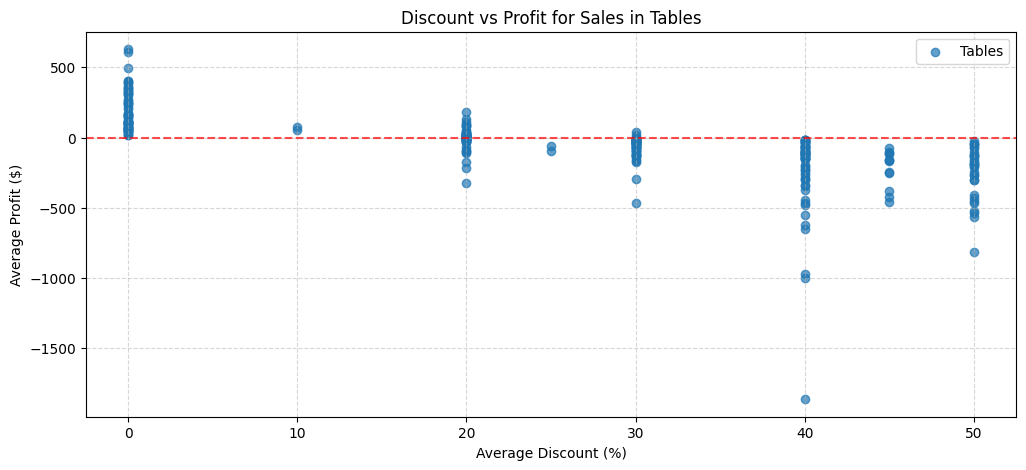

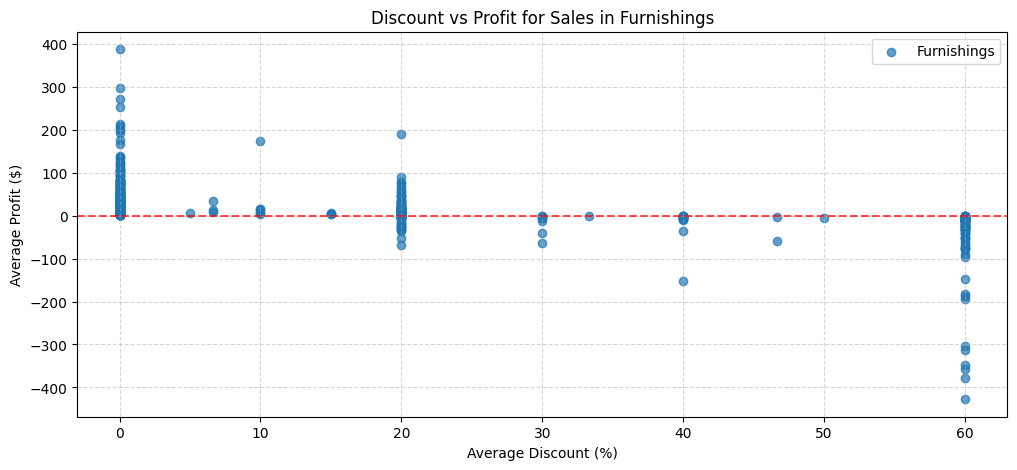

In [23]:
# Once again, let's take a look at the discounts and profits for the Furniture sub-categories, first up by State.

# Get unique sub-categories for Furniture
Furniture_subcategories = df[df["Category"] == "Furniture"]["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in Furniture_subcategories:
    # Filter data for the current sub-category
    subcategory_discount_data = df[(df["Category"] == "Furniture") & (df["Sub-Category"] == sub_category)]
    
    # Group by State, calculate mean Discount and Profit
    subcategory_discount_data = subcategory_discount_data.groupby("Sales")[["Discount", "Profit"]].mean().reset_index()
    
    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(subcategory_discount_data["Discount"] * 100, subcategory_discount_data["Profit"], alpha=0.7, label=sub_category)
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for Sales in {sub_category}")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [24]:
# We can see that there's a consistent pattern of losses for discount rates above 20% for both Bookcases and Tables.
# Chairs and Furnishings show a similar pattern, but the losses are not as severe.

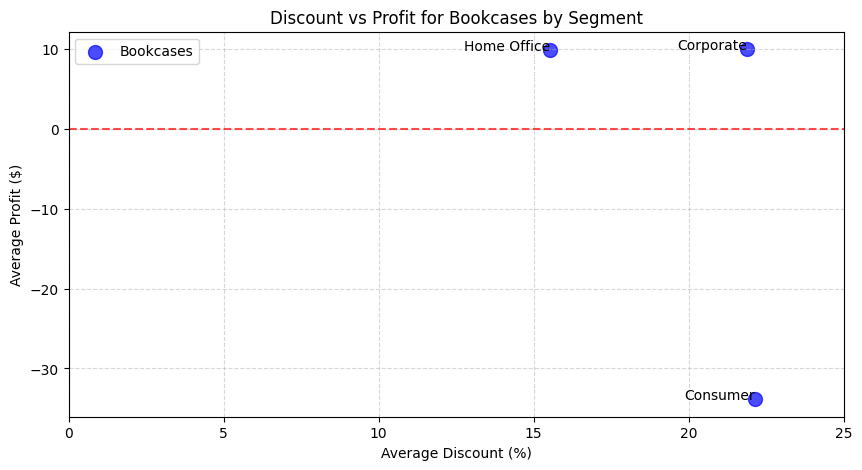

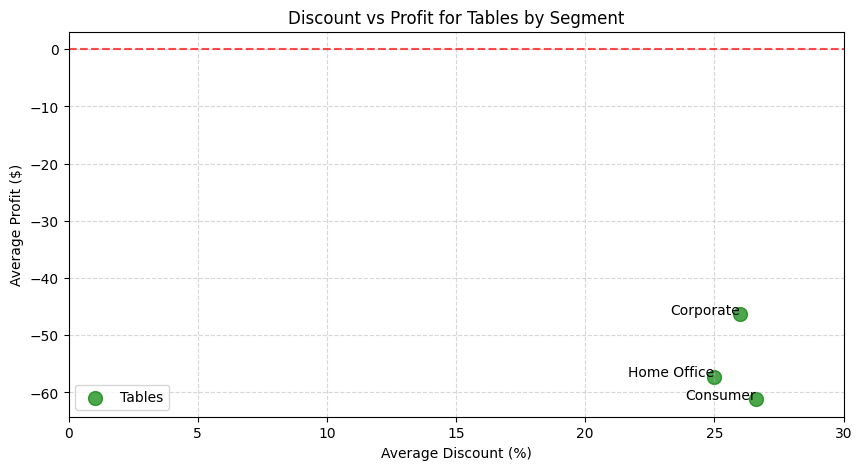

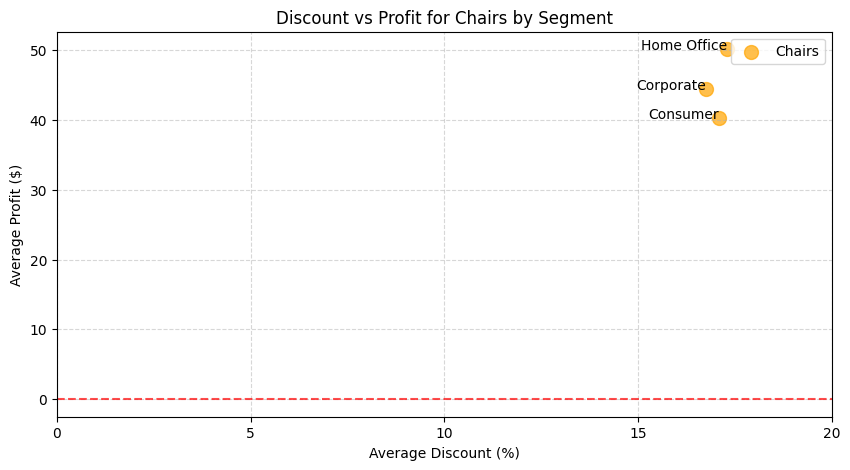

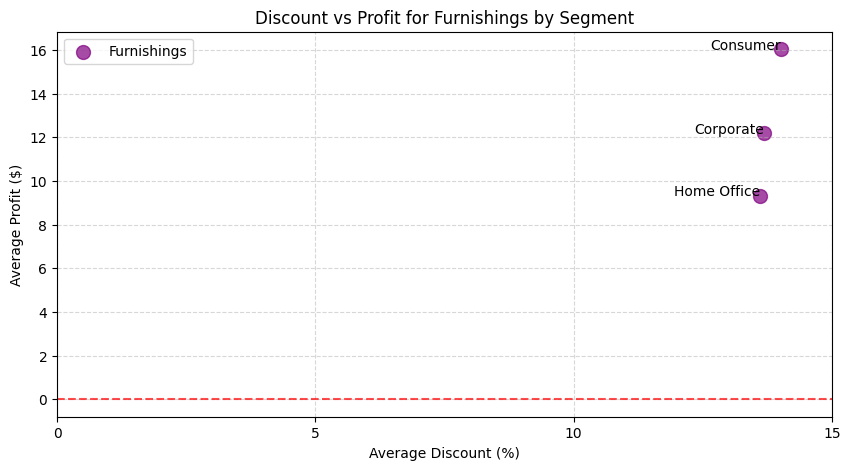

In [25]:
# Let's take a look at the correlation between customer types and discounts.

# Group by Segment and Sub-Category to analyze average discount for Furniture
furniture_segment_discount = df[df["Category"] == "Furniture"].groupby(["Segment", "Sub-Category"])[["Discount", "Profit"]].mean().reset_index()

# Filter for Bookcases and Tables since they are major loss-making sub-categories
bookcases_segment_discount = furniture_segment_discount[furniture_segment_discount["Sub-Category"] == "Bookcases"]
tables_segment_discount = furniture_segment_discount[furniture_segment_discount["Sub-Category"] == "Tables"]
chairs_segment_discount = furniture_segment_discount[furniture_segment_discount["Sub-Category"] == "Chairs"]
furnishing_segment_discount = furniture_segment_discount[furniture_segment_discount["Sub-Category"] == "Furnishings"]

# Improved Discounting Patterns for Bookcases & Tables by Segment

# Plot discounting patterns for Bookcases by Segment
plt.figure(figsize=(10, 5))
plt.scatter(bookcases_segment_discount["Discount"] * 100, bookcases_segment_discount["Profit"], 
            color='blue', label="Bookcases", alpha=0.7, s=100)

for i, txt in enumerate(bookcases_segment_discount["Segment"]):
    plt.annotate(txt, (bookcases_segment_discount["Discount"].iloc[i] * 100, 
                       bookcases_segment_discount["Profit"].iloc[i]), fontsize=10, ha='right')

plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Bookcases by Segment")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, int(max(bookcases_segment_discount["Discount"]) * 100) + 5, 5))  # Ensure tick values are visible
plt.legend()
plt.show()


# Plot discounting patterns for Tables by Segment
plt.figure(figsize=(10, 5))
plt.scatter(tables_segment_discount["Discount"] * 100, tables_segment_discount["Profit"], 
            color='green', label="Tables", alpha=0.7, s=100)

for i, txt in enumerate(tables_segment_discount["Segment"]):
    plt.annotate(txt, (tables_segment_discount["Discount"].iloc[i] * 100, 
                       tables_segment_discount["Profit"].iloc[i]), fontsize=10, ha='right')

plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Tables by Segment")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, int(max(tables_segment_discount["Discount"]) * 100) + 5, 5))  # Ensure tick values are visible
plt.legend()
plt.show()

# Plot discounting patterns for Chairs by Segment
plt.figure(figsize=(10, 5))
plt.scatter(chairs_segment_discount["Discount"] * 100, chairs_segment_discount["Profit"], 
            color='orange', label="Chairs", alpha=0.7, s=100)

for i, txt in enumerate(chairs_segment_discount["Segment"]):
    plt.annotate(txt, (chairs_segment_discount["Discount"].iloc[i] * 100, 
                       chairs_segment_discount["Profit"].iloc[i]), fontsize=10, ha='right')
    
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Chairs by Segment")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, int(max(chairs_segment_discount["Discount"]) * 100) + 5, 5))  # Ensure tick values are visible
plt.legend()
plt.show()

# Plot discounting patterns for Furnishings by Segment
plt.figure(figsize=(10, 5))
plt.scatter(furnishing_segment_discount["Discount"] * 100, furnishing_segment_discount["Profit"], 
            color='purple', label="Furnishings", alpha=0.7, s=100)

for i, txt in enumerate(furnishing_segment_discount["Segment"]):
    plt.annotate(txt, (furnishing_segment_discount["Discount"].iloc[i] * 100, 
                       furnishing_segment_discount["Profit"].iloc[i]), fontsize=10, ha='right')
    
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Furnishings by Segment")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, int(max(furnishing_segment_discount["Discount"]) * 100) + 5, 5))  # Ensure tick values are visible
plt.legend()
plt.show()

In [26]:
# For bookcases, discounts above 20% are leading to losses for the consumer category.
# For tables, discounts don't seem to have a clear correlation to losses.

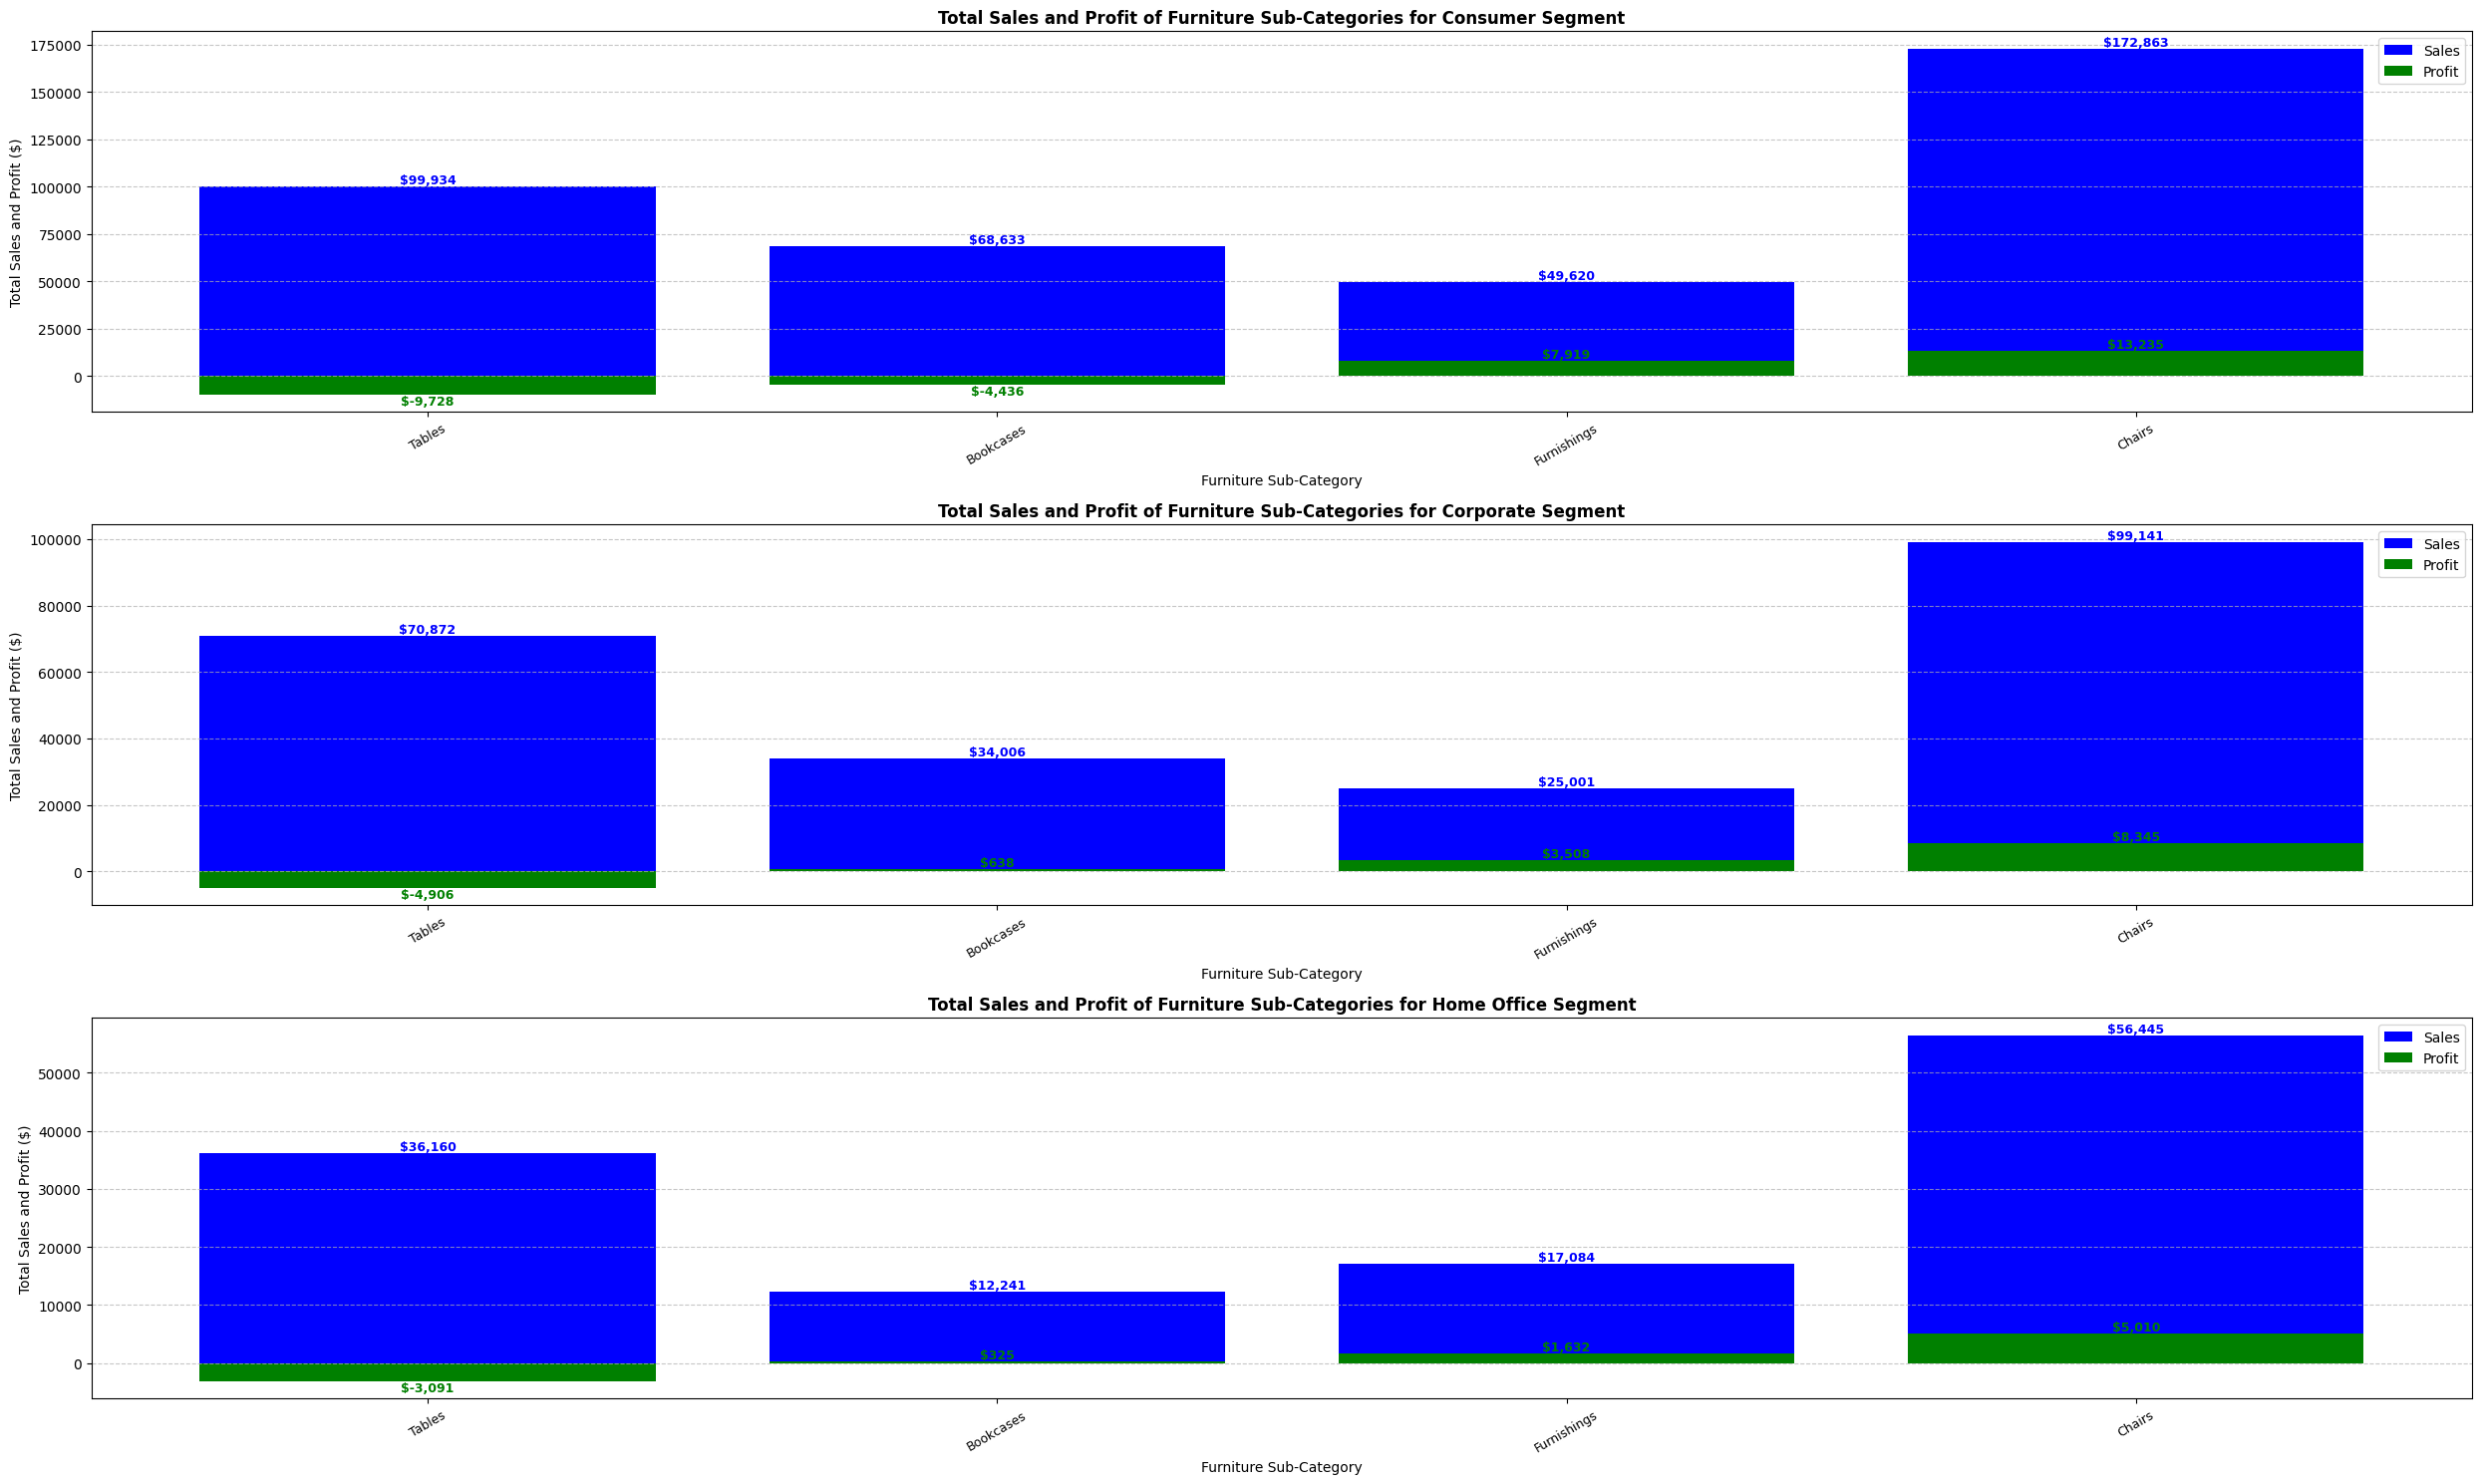

In [27]:


# Group sales and profit by sub-category and segment for Furniture
furniture_segment_sales_profits = df[df["Category"] == "Furniture"].groupby(["Segment", "Sub-Category"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit within each segment
furniture_segment_sales_profits = furniture_segment_sales_profits.sort_values(by=["Segment", "Profit"])

# Get unique segments
segments = furniture_segment_sales_profits["Segment"].unique()

# Create subplots for each customer segment
fig, axes = plt.subplots(nrows=len(segments), figsize=(25, len(segments) * 5))

# Ensure axes is iterable even if there's only one subplot
if len(segments) == 1:
    axes = [axes]

# Loop through each segment and plot sales & profit for sub-categories
for i, segment in enumerate(segments):
    segment_data = furniture_segment_sales_profits[furniture_segment_sales_profits["Segment"] == segment]

    # Create subplot for this segment
    ax = axes[i]

    # Bar chart for Sales
    bars1 = ax.bar(segment_data["Sub-Category"], segment_data["Sales"], color='blue', label='Sales')

    # Bar chart for Profit
    bars2 = ax.bar(segment_data["Sub-Category"], segment_data["Profit"], color='green', label='Profit')

    # Add labels on Sales bars
    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
                ha='center', va='bottom', fontsize=9, color="blue", fontweight="bold")

    # Add labels on Profit bars with adjustments for negative values
    for bar in bars2:
        height = bar.get_height()
        if height >= 0:
            va_position = 'bottom'  # Position above the bar for positive values
            offset = 5  # Offset upwards
        else:
            va_position = 'top'  # Position inside the bar for negative values
            offset = -5  # Offset downwards

        ax.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
                ha='center', va=va_position, fontsize=9, color="green", fontweight="bold")

    # Formatting
    ax.set_ylabel("Total Sales and Profit ($)", fontsize=10)
    ax.set_xlabel("Furniture Sub-Category", fontsize=10)
    ax.set_title(f"Total Sales and Profit of Furniture Sub-Categories for {segment} Segment", fontsize=12, fontweight="bold")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(segment_data["Sub-Category"])))  # Set fixed ticks
    ax.set_xticklabels(segment_data["Sub-Category"], rotation=30, fontsize=9)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [28]:
# Intersting, we can see that the consumer segment is the most profitable for all sub-categories in the Furniture category, however, it is responsible for the all losses in the bookcases sub-category.

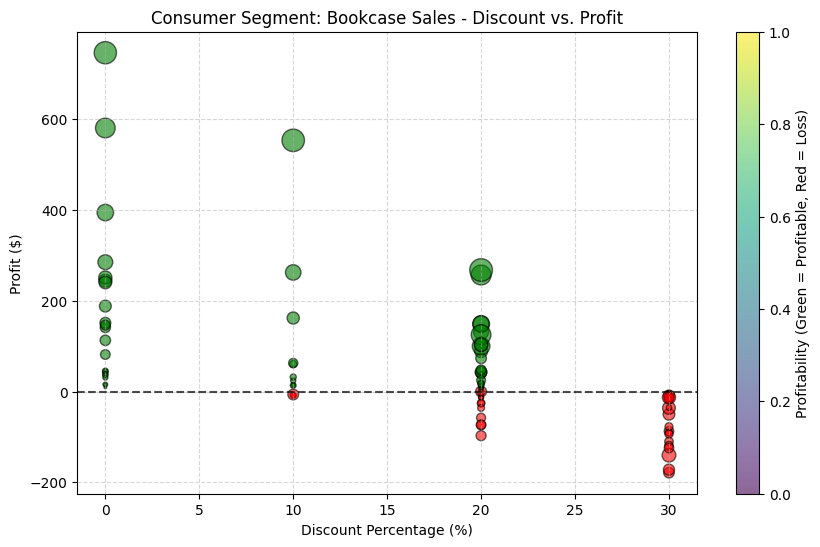

In [49]:
consumer_bookcases = df[(df["Sub-Category"] == "Chairs") & (df["Segment"] == "Home Office")]

# Scatter plot: Discount vs. Profit, with bubble size representing Sales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    consumer_bookcases["Discount"] * 100,  # Convert discount to percentage
    consumer_bookcases["Profit"],
    s=consumer_bookcases["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in consumer_bookcases["Profit"]],
    alpha=0.6, edgecolors="black"
)

# Formatting
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Consumer Segment: Bookcase Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")

# Show the plot
plt.show()

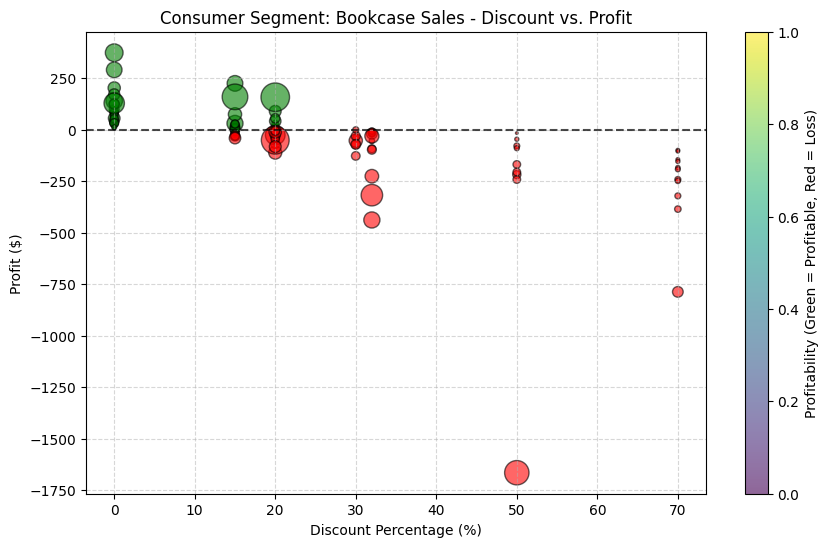

In [29]:
# Let's take a look at the the distribution os sales, profits and discounts in the bookcases sub-category for consumers.

consumer_bookcases = df[(df["Sub-Category"] == "Bookcases") & (df["Segment"] == "Consumer")]

# Scatter plot: Discount vs. Profit, with bubble size representing Sales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    consumer_bookcases["Discount"] * 100,  # Convert discount to percentage
    consumer_bookcases["Profit"],
    s=consumer_bookcases["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in consumer_bookcases["Profit"]],
    alpha=0.6, edgecolors="black"
)

# Formatting
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Consumer Segment: Bookcase Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")

# Show the plot
plt.show()


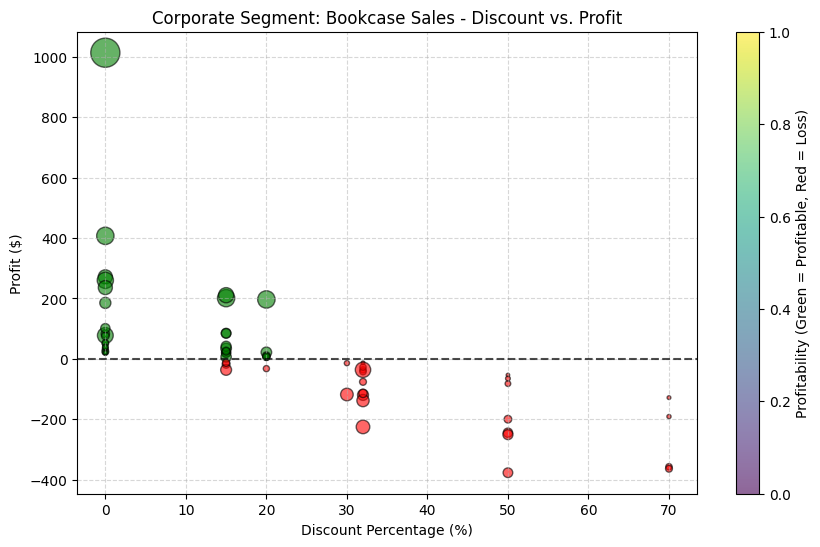

In [30]:
Corporate_bookcases = df[(df["Sub-Category"] == "Bookcases") & (df["Segment"] == "Corporate")]

# Scatter plot: Discount vs. Profit, with bubble size representing Sales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    Corporate_bookcases["Discount"] * 100,  # Convert discount to percentage
    Corporate_bookcases["Profit"],
    s=Corporate_bookcases["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in Corporate_bookcases["Profit"]],
    alpha=0.6, edgecolors="black"
)

# Formatting
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Corporate Segment: Bookcase Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")

# Show the plot
plt.show()

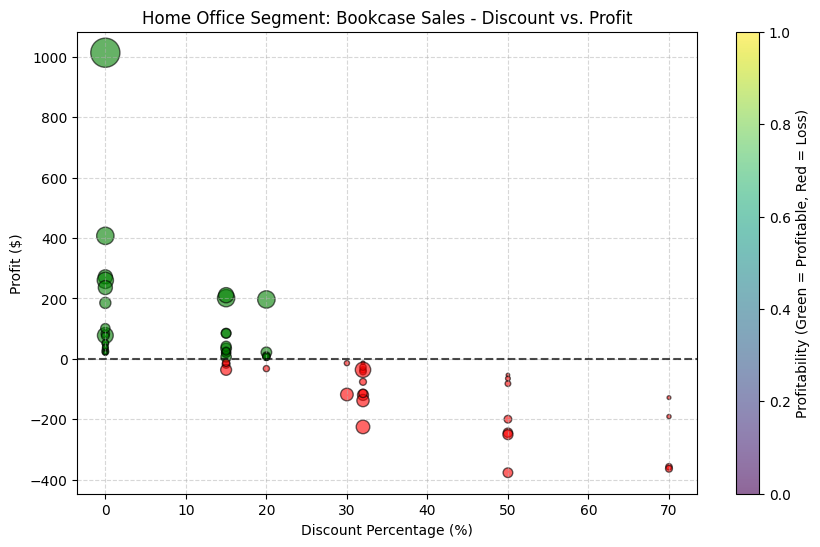

In [31]:
Home_bookcases = df[(df["Sub-Category"] == "Bookcases") & (df["Segment"] == "Corporate")]

# Scatter plot: Discount vs. Profit, with bubble size representing Sales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    Home_bookcases["Discount"] * 100,  # Convert discount to percentage
    Home_bookcases["Profit"],
    s=Home_bookcases["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in Home_bookcases["Profit"]],
    alpha=0.6, edgecolors="black"
)

# Formatting
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Home Office Segment: Bookcase Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")

In [32]:
# Once again, 20% seems to be the balance point for discounts being profitable or not.
# Let's take a closer look at that.

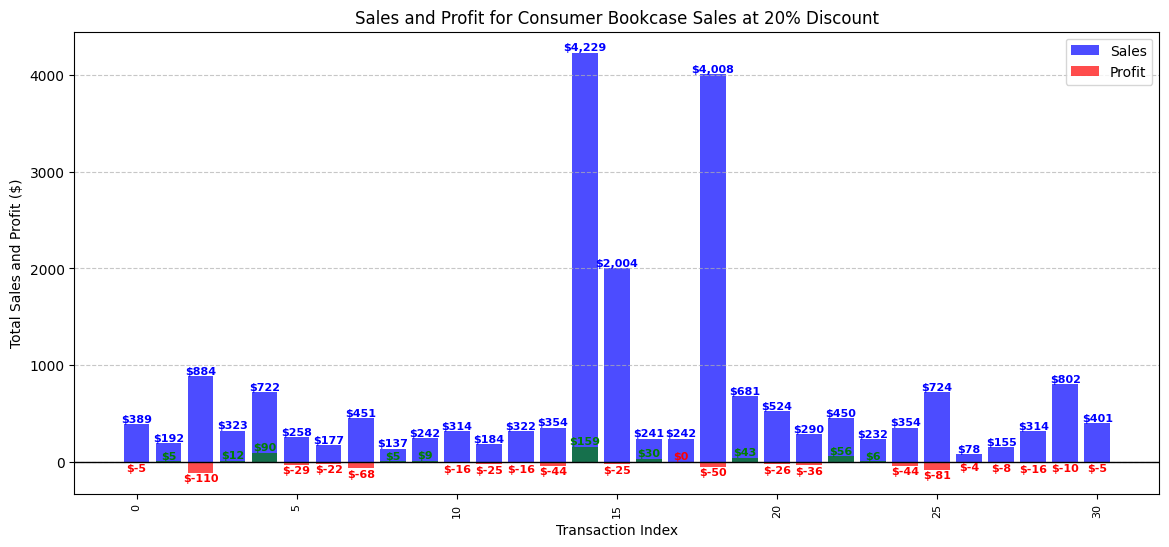

In [33]:
# Filter data for Consumer segment, Bookcases, and exactly 20% discount
consumer_bookcases_20_discount = df[(df["Sub-Category"] == "Bookcases") & 
                                    (df["Segment"] == "Consumer") & 
                                    (df["Discount"] == 0.20)]

# Reset index to use as transaction reference
consumer_bookcases_20_discount = consumer_bookcases_20_discount.reset_index()

# Sort by Profit (ascending)
consumer_bookcases_20_discount = consumer_bookcases_20_discount.sort_values(by='Profit')

# Plot total sales and profit for transactions at 20% discount
plt.figure(figsize=(14, 6))

# Bar chart for Sales
bars1 = plt.bar(consumer_bookcases_20_discount.index, consumer_bookcases_20_discount["Sales"], 
                color='blue', label='Sales', alpha=0.7)

# Bar chart for Profit
bars2 = plt.bar(consumer_bookcases_20_discount.index, consumer_bookcases_20_discount["Profit"], 
                color=['green' if p > 0 else 'red' for p in consumer_bookcases_20_discount["Profit"]], label='Profit', alpha=0.7)

# Add labels on Sales bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=8, color="blue", fontweight="bold")

# Add labels on Profit bars with adjustments for negative values
for bar in bars2:
    height = bar.get_height()
    if height >= 0:
        va_position = 'bottom'  # Position above the bar for positive values
        offset = 5  # Offset upwards
    else:
        va_position = 'top'  # Position inside the bar for negative values
        offset = -5  # Offset downwards

    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
             ha='center', va=va_position, fontsize=8, color="green" if height > 0 else "red", fontweight="bold")

# Formatting
plt.ylabel("Total Sales and Profit ($)")
plt.xlabel("Transaction Index")
plt.title("Sales and Profit for Consumer Bookcase Sales at 20% Discount")
plt.xticks(rotation=90, fontsize=8)  # Rotate transaction indices for readability
plt.axhline(0, color="black", linewidth=1)  # Reference line at zero profit
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [34]:
# Looking at the data, we can conclude that bookcase discounts should be capped below 20% for consumers to avoid losses since even bulk sales are not profitable at that discount rate. 
# Even though Corporate and Home Office are making profits, they are low due to the losses caused past the 20% discount rate.
# Next up, we will be looking at tables.

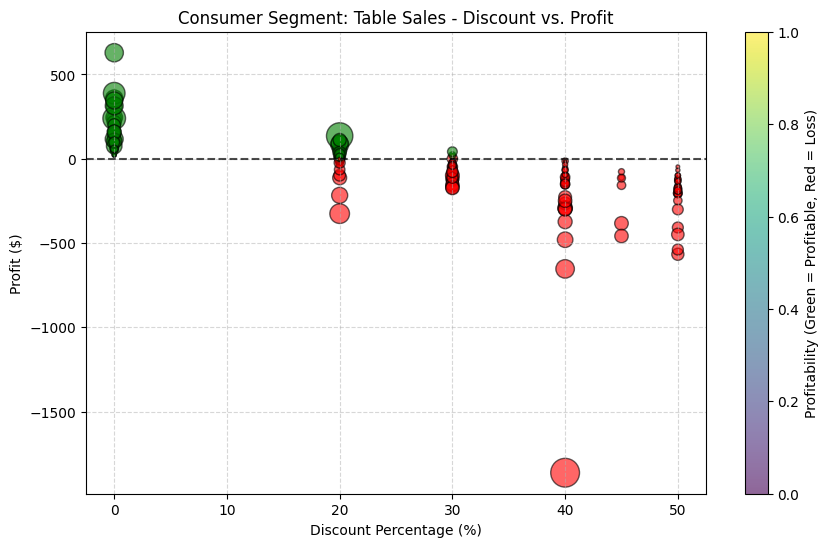

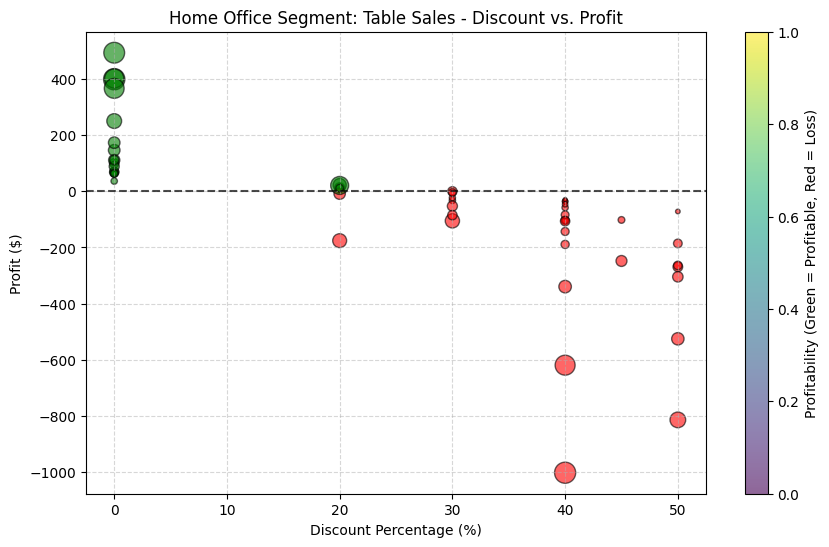

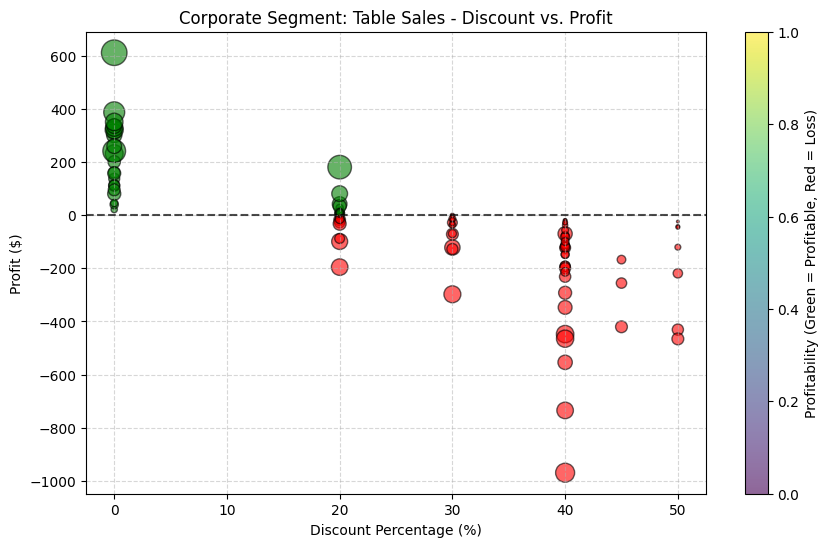

In [35]:
# We'll be making scatter plots for the tables sub-category to see if we can find the same patterns for discounts and profits.

consumer_tables = df[(df["Sub-Category"] == "Tables") & (df["Segment"] == "Consumer")]
Home_tables = df[(df["Sub-Category"] == "Tables") & (df["Segment"] == "Home Office")]
Corporate_tables = df[(df["Sub-Category"] == "Tables") & (df["Segment"] == "Corporate")]

# Scatter plot: Discount vs. Profit, with bubble size representing Sales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    consumer_tables["Discount"] * 100,  # Convert discount to percentage
    consumer_tables["Profit"],
    s=consumer_tables["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in consumer_tables["Profit"]],
    alpha=0.6, edgecolors="black"
)

# Consumer discount vs profit scatter plot
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Consumer Segment: Table Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()

# Home office discount vs profit scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    Home_tables["Discount"] * 100,  # Convert discount to percentage
    Home_tables["Profit"],
    s=Home_tables["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in Home_tables["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Home Office Segment: Table Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()

# Corporate discount vs profit scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    Corporate_tables["Discount"] * 100,  # Convert discount to percentage
    Corporate_tables["Profit"],
    s=Corporate_tables["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in Corporate_tables["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Corporate Segment: Table Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()

In [36]:
# Once again, profits are lost at discount rates above 20% for all segments.
# Out of curiosity, let's take a look at the Furniture sub-categories that make profits.

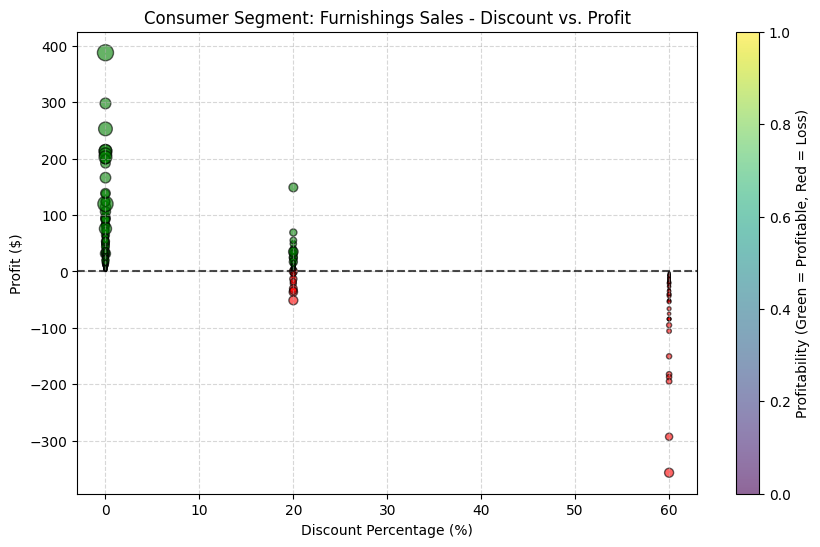

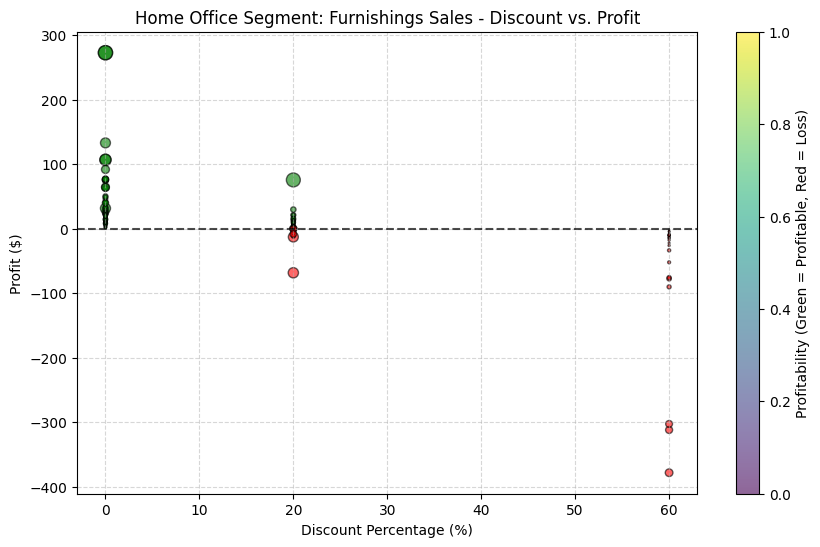

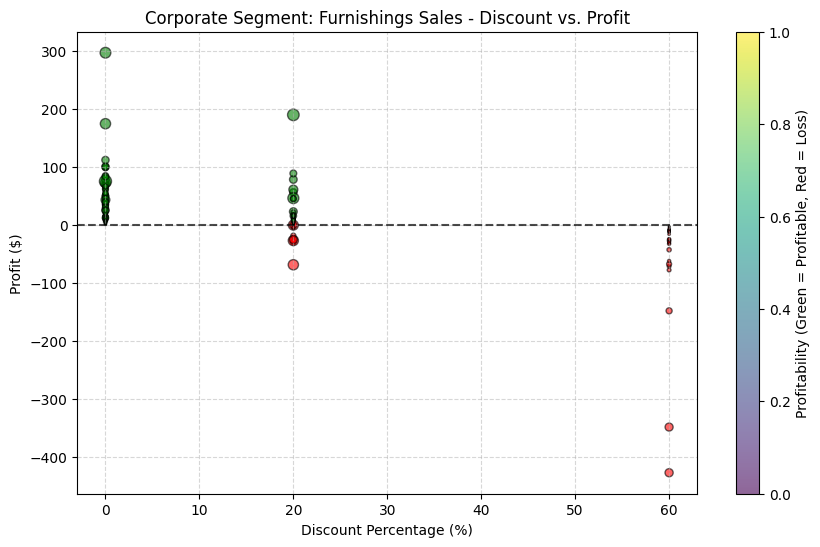

In [37]:
# We'll be making scatter plots for the Furnishings sub-category to see the distribution of discounts and profits.

# Filter data for Furnishings by segment
consumer_furnishings = df[(df["Sub-Category"] == "Furnishings") & (df["Segment"] == "Consumer")]
home_furnishings = df[(df["Sub-Category"] == "Furnishings") & (df["Segment"] == "Home Office")]
corporate_furnishings = df[(df["Sub-Category"] == "Furnishings") & (df["Segment"] == "Corporate")]

# Consumer discount vs profit scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    consumer_furnishings["Discount"] * 100,  # Convert discount to percentage
    consumer_furnishings["Profit"],
    s=consumer_furnishings["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in consumer_furnishings["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Consumer Segment: Furnishings Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()

# Home Office discount vs profit scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    home_furnishings["Discount"] * 100,  # Convert discount to percentage
    home_furnishings["Profit"],
    s=home_furnishings["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in home_furnishings["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Home Office Segment: Furnishings Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()

# Corporate discount vs profit scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    corporate_furnishings["Discount"] * 100,  # Convert discount to percentage
    corporate_furnishings["Profit"],
    s=corporate_furnishings["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in corporate_furnishings["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Corporate Segment: Furnishings Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()


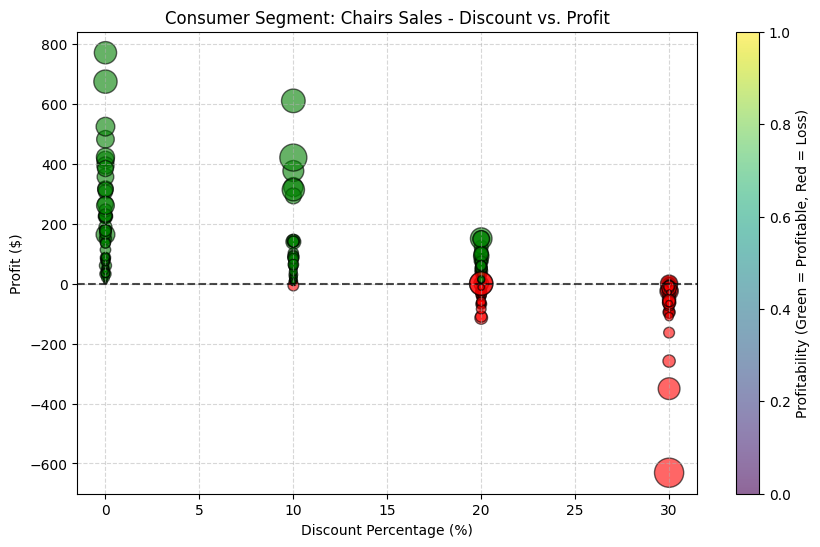

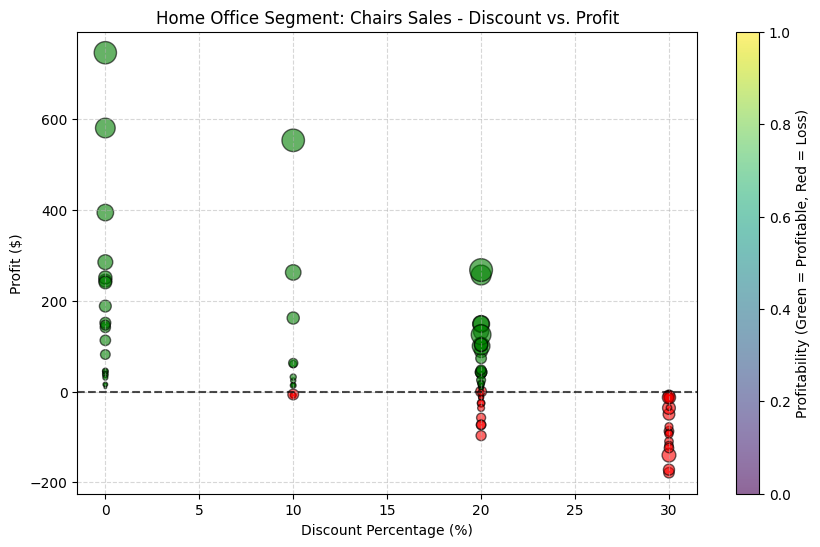

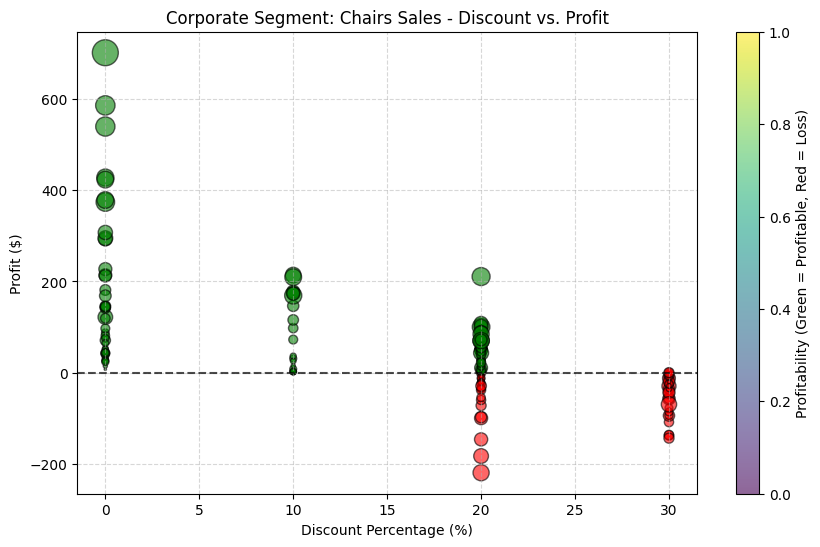

In [38]:
# We'll be making scatter plots for the Chairs sub-category to see the distribution of discounts and profits.

# Filter data for Chairs by segment
consumer_chairs = df[(df["Sub-Category"] == "Chairs") & (df["Segment"] == "Consumer")]
home_chairs = df[(df["Sub-Category"] == "Chairs") & (df["Segment"] == "Home Office")]
corporate_chairs = df[(df["Sub-Category"] == "Chairs") & (df["Segment"] == "Corporate")]

# Consumer discount vs profit scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    consumer_chairs["Discount"] * 100,  # Convert discount to percentage
    consumer_chairs["Profit"],
    s=consumer_chairs["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in consumer_chairs["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Consumer Segment: Chairs Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()

# Home Office discount vs profit scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    home_chairs["Discount"] * 100,  # Convert discount to percentage
    home_chairs["Profit"],
    s=home_chairs["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in home_chairs["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Home Office Segment: Chairs Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()

# Corporate discount vs profit scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    corporate_chairs["Discount"] * 100,  # Convert discount to percentage
    corporate_chairs["Profit"],
    s=corporate_chairs["Sales"] / 10,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in corporate_chairs["Profit"]],
    alpha=0.6, edgecolors="black"
)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Corporate Segment: Chairs Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")
plt.show()


In [39]:
# Very interesting, even the profitable sub-categories show a pattern of losses at discount rates above 20%.
# This is a clear indication that discounts should be capped in the furniture category to improve profitability.
# Depending on what categories are generating the most losses in 

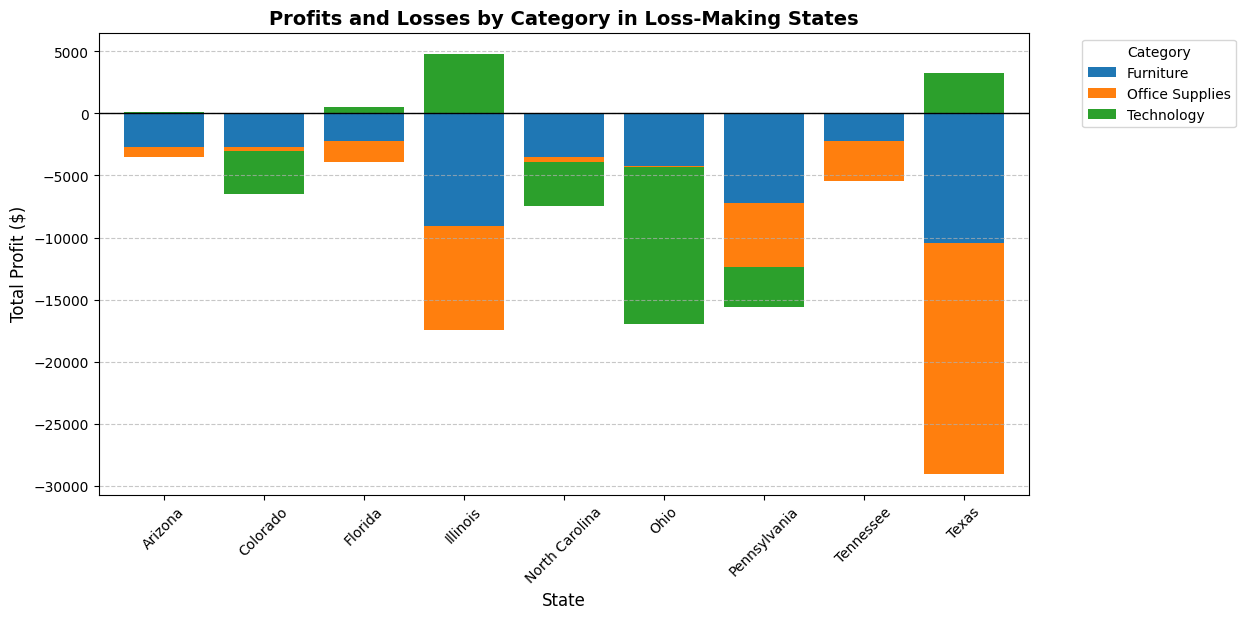

In [40]:
loss_making_states = ["Texas", "Ohio", "Pennsylvania", "Illinois", "North Carolina", 
                      "Colorado", "Tennessee", "Arizona", "Florida"]

# Filter the dataset for these states
df_loss_states = df[df["State"].isin(loss_making_states)]

# Group by Category and State, summing up the profits
category_state_profits = df_loss_states.groupby(["State", "Category"])["Profit"].sum().unstack()

# Plot bar chart for profits/losses by category in these states
category_state_profits.plot(kind="bar", figsize=(12, 6), width=0.8, stacked=True)

# Formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Profit ($)", fontsize=12)
plt.title("Profits and Losses by Category in Loss-Making States", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # Rotate state labels for better visibility
plt.axhline(0, color="black", linewidth=1)  # Reference line for zero profit
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

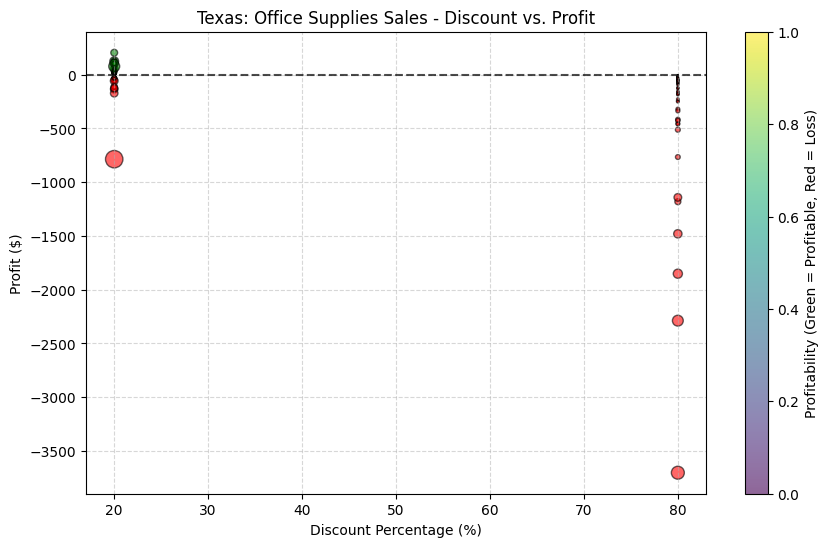

In [41]:
Texas_supplies = df[(df["Category"] == "Office Supplies") & (df["State"] == "Texas")]

# Scatter plot: Discount vs. Profit, with bubble size representing Sales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    Texas_supplies["Discount"] * 100,  # Convert discount to percentage
    Texas_supplies["Profit"],
    s=Texas_supplies["Sales"] / 25,  # Scale sales for better visibility
    c=['green' if p > 0 else 'red' for p in Texas_supplies["Profit"]],
    alpha=0.6, edgecolors="black"
)

# Formatting
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Profit ($)")
plt.title("Texas: Office Supplies Sales - Discount vs. Profit")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at zero profit
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(label="Profitability (Green = Profitable, Red = Loss)")

In [42]:
texas_office_supplies_20 = df[(df["Category"] == "Office Supplies") & 
                              (df["State"] == "Texas") & 
                              (df["Discount"] == 0.20)]

profit_transactions_20 = texas_office_supplies_20[texas_office_supplies_20["Profit"] > 0].shape[0]
loss_transactions_20 = texas_office_supplies_20[texas_office_supplies_20["Profit"] <= 0].shape[0]

# Create a summary dataframe
transactions_20_summary = pd.DataFrame({
    "Transaction Type": ["Profitable Sales", "Loss-Making Sales"],
    "Count": [profit_transactions_20, loss_transactions_20]
})

transactions_20_summary

Transaction Type  Count
0   Profitable Sales    351
1  Loss-Making Sales     53

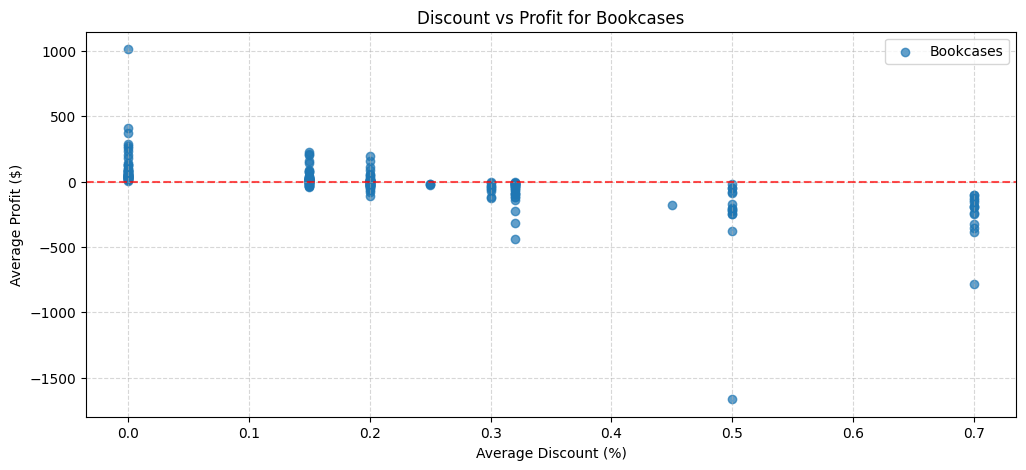

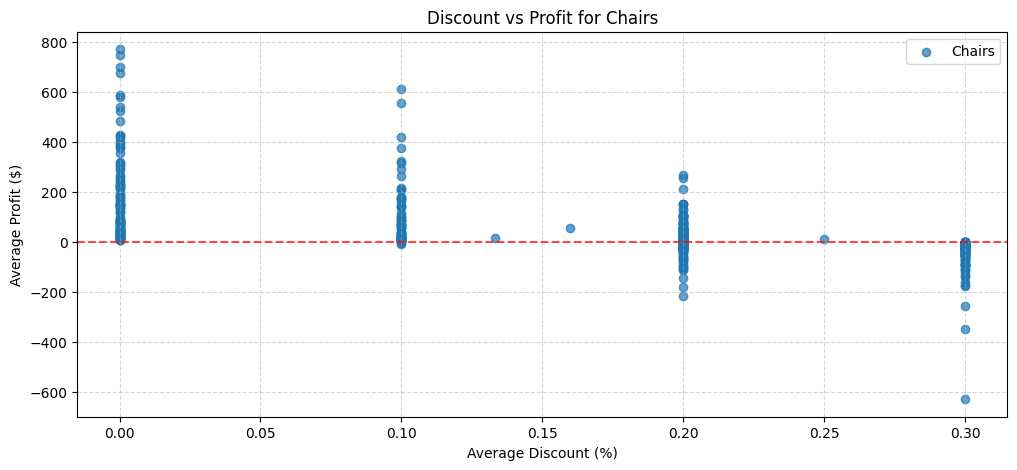

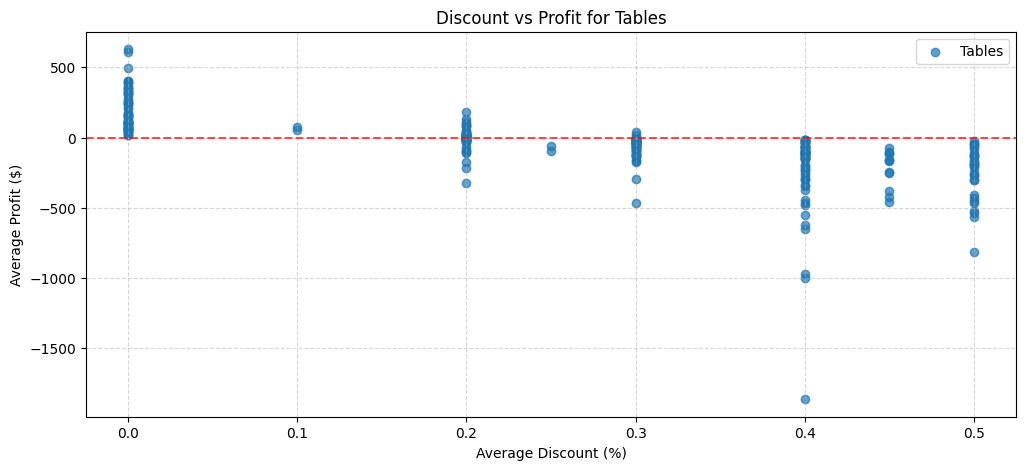

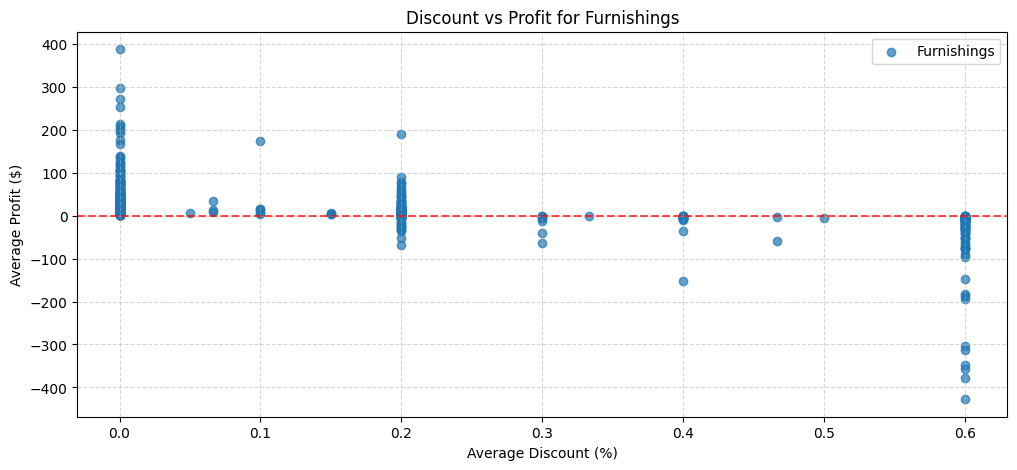

In [43]:
# Filter data for Office Supplies category
Furniture_discount_analysis2 = df[df["Category"] == "Furniture"]

# Group by Sub-Category and State, calculate mean Discount and Profit
Furniture_discount_analysis2 = Furniture_discount_analysis2.groupby(["Sub-Category", "Sales"])[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories for Office Supplies
Furniture_subcategories = Furniture_discount_analysis2["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in furniture_subcategories:
    # Filter data for the current sub-category
    Furniture_subcategory_discount_data = Furniture_discount_analysis2[Furniture_discount_analysis2["Sub-Category"] == sub_category]
    
    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(Furniture_subcategory_discount_data["Discount"], Furniture_subcategory_discount_data["Profit"], alpha=0.7, label=sub_category)
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for {sub_category}")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


In [46]:
# Findings on Discounting Rates Affecting the Furniture Category, Sub-Categories, and Consumer Segments:
# 
# 1. General Findings:
#    - Discounts above 20% consistently lead to losses across all sub-categories in the Furniture category.
#    - A discount cap of 10–15% is recommended to improve profitability.
# 
# 2. Bookcases:
#    - High losses are driven by discounts exceeding 20%.
#    - The Consumer segment is responsible for most of the losses in this sub-category.
# 
# 3. Tables:
#    - Most states incur losses in the Tables sub-category.
#    - Discounts above 20% lead to negative profits across all segments (Consumer, Corporate, and Home Office).
# 
# 4. Chairs:
#    - Generally profitable but shows a sharp decline in profitability beyond a 20% discount.
# 
# 5. Furnishings:
#    - Profitable overall but suffers losses when discounts exceed 20%.
# 
# 6. Segment-Specific Insights:
#    - The Consumer segment is the most vulnerable to deep discount losses.
#    - Corporate and Home Office segments are more resilient but still experience reduced profitability at higher discount rates.
# 
# 7. Loss-Making States:
#    - States like Texas, Ohio, Pennsylvania, Illinois, and others show significant losses in the Furniture category.
#    - Losses in these states are exacerbated by high discount rates.
# 
# 8. Strategy Recommendations:
#    - Cap discounts at 10–15% to minimize losses.
#    - Avoid discounting high-loss sub-categories like Bookcases and Tables.
#    - Focus on targeting Corporate and Home Office segments, which are more resilient to discounting.